# [Data Analysis]


### Outline:

1. EDA  
<br>
2. Investigation of Return Predictability of SA Short Recommendations
    * Q1: *Do overall short recommendations of SA predict future stock returns?*
    * Q2: *Do short recommendations of SA top opinion leaders predict future stock returns?*
    * Q3: *Do short recommendations of SA Editors’ Pick Articles predict future stock returns?*
    * Q4: *Do short recommendations of SA from authors that have sold short the stock predict future stock returns?*
    * Q5: *Are there any authors of SA short ideas articles who predict future stock returns?*  
<br>      
3. Conclusion    
    

---
   

# 1. EDA

The time period of the dataset, based on the article publication date, is from 1/1/2012 to 12/31/2015. It contains 7,873 single-ticker articles that discuss 1,637 different stocks, written by 1,622 authors.

## 1-1. Summary of dataframe

In [1]:
# Import libraries for data analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# To plot figs on jupyter
%matplotlib inline

# Set max rows and columns to display
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)


In [2]:
# Import the dataframe containing short ideas and return data
df = pd.read_pickle('data/df_inner_nlp.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7873 entries, 0 to 7872
Data columns (total 37 columns):
datetime          7873 non-null datetime64[ns]
date              7873 non-null datetime64[ns]
article_id        7873 non-null int64
author_id         7873 non-null int64
author_name       7873 non-null object
editors_pick      7873 non-null bool
company_name      7873 non-null object
ticker            7873 non-null object
article_url       7873 non-null object
author_url        7873 non-null object
5d_ret            7873 non-null float64
10d_ret           7873 non-null float64
20d_ret           7873 non-null float64
40d_ret           7873 non-null float64
60d_ret           7873 non-null float64
80d_ret           7873 non-null float64
100d_ret          7873 non-null float64
mkt_cap           7873 non-null float64
siccd             7873 non-null object
sic2              7873 non-null int64
sic2_name         7873 non-null object
year              7873 non-null int64
yr_qt            

In [4]:
df.head()

,datetime,date,article_id,author_id,author_name,editors_pick,company_name,ticker,article_url,author_url,5d_ret,10d_ret,20d_ret,40d_ret,60d_ret,80d_ret,100d_ret,mkt_cap,siccd,sic2,sic2_name,year,yr_qt,yr_qt_str,author_bio,body,disclosure_cat,Num_syl,Num_words,Num_sent,neg_ratio_abs,pos_ratio_abs,unc_ratio_abs,v_neg,v_pos,v_neu,v_comp
0,2012-01-01 11:18:00,2012-01-01,316904,973944,Honne Capital,False,Mattress Firm Holding Corp.,MFRM,https://seekingalpha.com/article/316904-mattre...,https://seekingalpha.com/author/honne-capital/...,0.034929,0.168177,0.374773,0.465286,0.643379,0.726604,0.670544,835782.75,9999,99,Nonclassifiable,2012,2012Q1,2012Q1,"Hedge fund manager, bonds, long/short equity",[I hold a short position in Mattress Firm beca...,n/a,5298,3353,151,0.022368,0.005965,0.006263,0.035914,0.057781,0.906311,0.062362
1,2012-01-03 09:00:00,2012-01-03,317052,201452,Gary Weiss,False,"Overstock.com, Inc.",OSTK,https://seekingalpha.com/article/317052-does-p...,https://seekingalpha.com/author/gary-weiss/art...,-0.089493,-0.115434,-0.105058,-0.207523,-0.320363,-0.217901,-0.141379,174825.29,5999,59,Retail,2012,2012Q1,2012Q1,NaN,"[My runner-up for , , Overstock.com (NASDAQ:, ...",No Position No Plan,1235,825,38,0.043636,0.010909,0.009697,0.126211,0.057158,0.816632,-0.122453
2,2012-01-04 14:40:00,2012-01-04,317392,1072567,Ryan Canady,False,Lululemon Athletica Inc.,LULU,https://seekingalpha.com/article/317392-lulule...,https://seekingalpha.com/author/ryan-canady/ar...,0.197263,0.175366,0.262560,0.345453,0.461190,0.486801,0.426781,5668688.40,5600,56,Retail,2012,2012Q1,2012Q1,"Long/short equity, value, Deep Value","[I have been on Lululemon's (NASDAQ:, ) case f...",No Position No Plan,786,565,26,0.007080,0.010619,0.010619,0.033423,0.111423,0.855154,0.225646
3,2012-01-04 20:01:00,2012-01-04,317485,1017993,Bill Maurer,False,"Netflix, Inc.",NFLX,https://seekingalpha.com/article/317485-is-it-...,https://seekingalpha.com/author/bill-maurer/ar...,0.145431,0.245991,0.571534,0.377378,0.416656,0.011312,-0.162958,4393140.70,7841,78,Services,2012,2012Q1,2012Q1,"Long/short equity, long only, short only, Growth","[We all know that Netflix , was one of the bi...",Short,2984,2127,120,0.023507,0.020216,0.016455,0.069450,0.090242,0.840292,0.032123
4,2012-01-05 02:28:00,2012-01-05,317500,1026396,Shmulik Karpf,False,Barnes & Noble Inc,BKS,https://seekingalpha.com/article/317500-barnes...,https://seekingalpha.com/author/shmulik-karpf/...,0.000890,0.072953,0.183273,0.161032,0.145017,0.653021,0.461741,673358.25,5942,59,Retail,2012,2012Q1,2012Q1,"Long/short equity, growth at reasonable price,...","[On December 25th, I initiated a , Barnes & N...",Short,652,417,19,0.016746,0.000000,0.009569,0.021526,0.083947,0.894526,0.142711


In [5]:
df.describe()

,article_id,author_id,5d_ret,10d_ret,20d_ret,40d_ret,60d_ret,80d_ret,100d_ret,mkt_cap,sic2,year,Num_syl,Num_words,Num_sent,neg_ratio_abs,pos_ratio_abs,unc_ratio_abs,v_neg,v_pos,v_neu,v_comp
count,7.873000e+03,7.873000e+03,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7.873000e+03,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000
mean,2.025169e+06,7.420121e+06,-0.004924,-0.004379,-0.001278,-0.001174,0.006806,0.016923,0.021312,4.247724e+07,57.436174,2013.592531,1869.942970,1212.337737,59.104407,0.019755,0.010515,0.012039,0.056427,0.087505,0.854969,0.091846
std,9.428709e+05,1.016260e+07,0.089669,0.121843,0.154896,0.212789,0.264897,0.308668,0.354158,1.002573e+08,25.668215,1.065132,1457.076465,919.505942,42.275129,0.009633,0.005695,0.005852,0.022799,0.027636,0.032648,0.105060
min,3.169040e+05,4.760000e+02,-0.694445,-0.713759,-0.737375,-0.886185,-0.873523,-0.895981,-0.912762,2.830500e+03,0.000000,2012.000000,8.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.477230,-0.400577
25%,1.277861e+06,7.574210e+05,-0.040655,-0.053732,-0.077309,-0.112069,-0.137653,-0.152592,-0.176926,8.539219e+05,36.000000,2013.000000,1053.000000,689.000000,34.000000,0.013110,0.006590,0.007968,0.040488,0.068648,0.835027,0.023467
50%,2.053213e+06,2.630221e+06,-0.001822,-0.001000,-0.000451,0.000157,0.003312,0.012081,0.013705,4.392207e+06,56.000000,2014.000000,1509.000000,982.000000,48.000000,0.018373,0.009709,0.011364,0.053648,0.085385,0.855923,0.089719
75%,2.773345e+06,9.110881e+06,0.031884,0.044711,0.065322,0.097863,0.125177,0.151949,0.169600,2.648289e+07,73.000000,2014.000000,2201.000000,1430.000000,70.000000,0.024862,0.013514,0.015281,0.069415,0.104023,0.876345,0.156296
max,3.785566e+06,4.861358e+07,1.708119,3.364422,1.891192,3.677621,3.016526,3.651323,5.313265,7.698569e+08,99.000000,2015.000000,37923.000000,23505.000000,880.000000,0.083067,0.059322,0.060823,0.192000,0.252200,1.000000,0.578427


## 1-2. Number of articles published by year

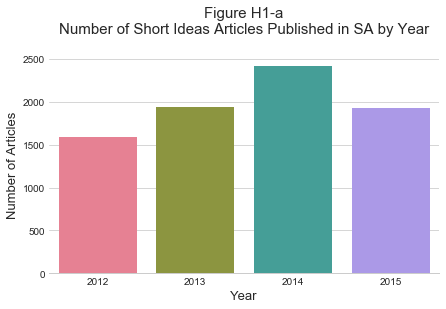

In [6]:
# Number of Short Ideas Articles Published in SA by Year
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, ax1 = plt.subplots(figsize=(7,4))

## ax1
# Setting
yr_lst = [2012, 2013, 2014, 2015]

# Draw a plot
g1 = sns.factorplot(x="year", data=df[['article_id','year']], kind="count", palette="husl", order=yr_lst, ax=ax1)
ax1.set_title('Figure H1-a\nNumber of Short Ideas Articles Published in SA by Year\n', fontsize=15)
ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylabel('Number of Articles', fontsize=13)
sns.despine(ax=ax1, left=True)

plt.close(g1.fig)

## 1-3. Number of articles published by year and quarter

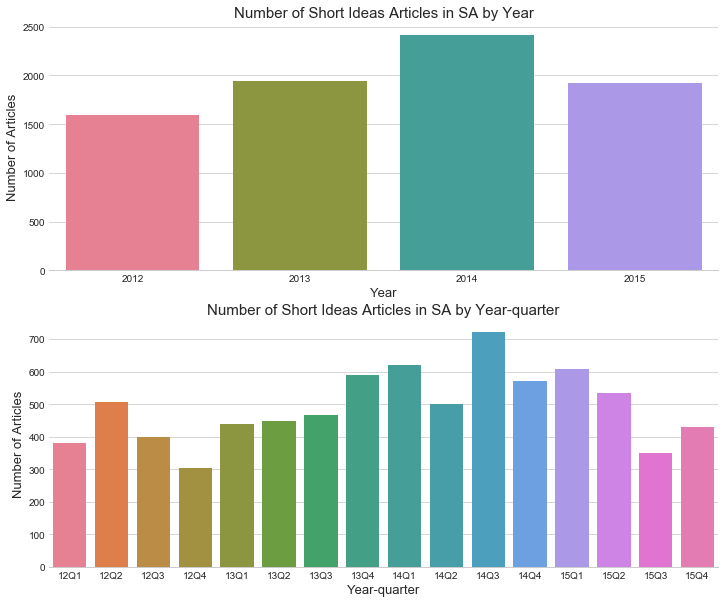

In [7]:
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,10))

## ax1
# Setting
yr_lst = [2012, 2013, 2014, 2015]

# Draw a plot
g1 = sns.factorplot(x="year", data=df[['article_id','year']], 
               kind="count", palette="husl", order=yr_lst, ax=ax1)
ax1.set_title('Number of Short Ideas Articles in SA by Year', fontsize=15)
ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylabel('Number of Articles', fontsize=13)
sns.despine(ax=ax1, left=True)

## ax2
# Setting
yr_qt_lst = ['12Q1','12Q2','12Q3','12Q4','13Q1','13Q2','13Q3','13Q4',\
             '14Q1','14Q2','14Q3','14Q4','15Q1','15Q2','15Q3','15Q4']
df['yr_qt_abb'] = df.yr_qt_str.str[2:]

# Draw a plot
g2 = sns.factorplot(x="yr_qt_abb", data=df[['article_id','yr_qt_abb']], kind="count",
                   palette="husl", order=yr_qt_lst, ax=ax2)
ax2.set_title('Number of Short Ideas Articles in SA by Year-quarter', fontsize=15)
ax2.set_xlabel('Year-quarter', fontsize=13)
ax2.set_ylabel('Number of Articles', fontsize=13)
sns.despine(ax=ax2, left=True)

plt.close(g1.fig)
plt.close(g2.fig)

## 1-4. Number of authors

In [8]:
# Number of unique authors
len(df.author_id.unique())

1622

## 1-5. Number of stocks discussed in the articles

In [9]:
# Number of unique stocks
len(df.ticker.unique())

1637

## 1-6. Distribution of the number of articles published by each author

In [10]:
df.author_id.value_counts().describe()

count    1622.000000
mean        4.853884
std        13.727730
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       246.000000
Name: author_id, dtype: float64

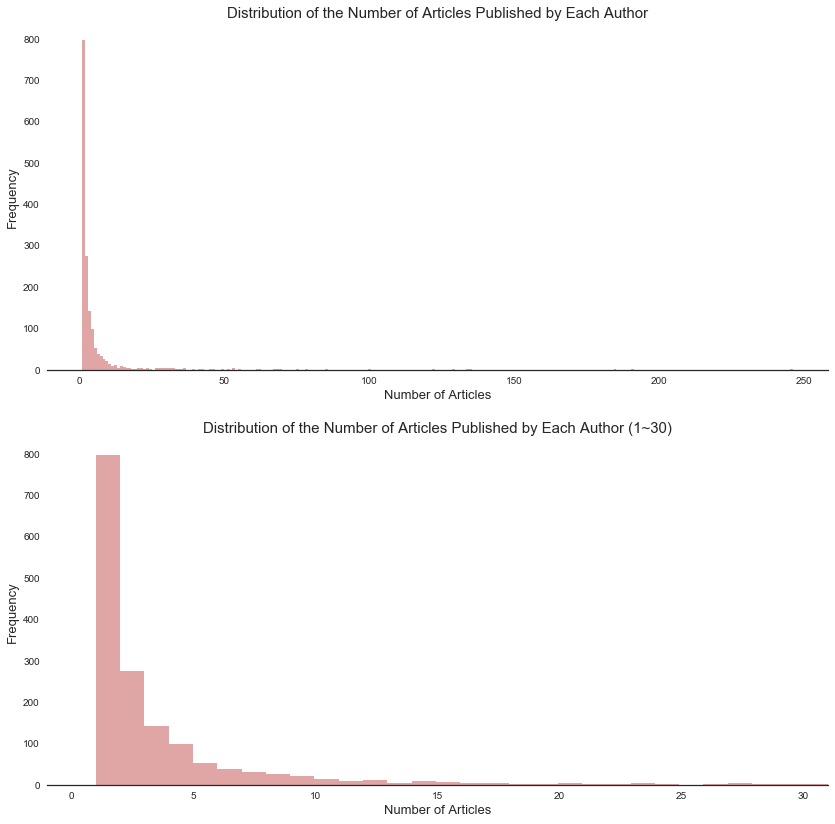

In [11]:
# Distribution of the Number of Articles Published by Each Author
import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")

# Initialize figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,14))

# Setting
num_articles_by_author = df.author_id.value_counts()

## ax1
# Draw a plot
sns.distplot(num_articles_by_author, bins=246, kde=False, color="firebrick", ax=ax1)
ax1.set_title('Distribution of the Number of Articles Published by Each Author', fontsize=15)
ax1.set_xlabel('Number of Articles', fontsize=13)
ax1.set_ylabel('Frequency', fontsize=13)
sns.despine(ax=ax1, left=True, bottom=False)

## ax2
# Draw a plot
sns.distplot(num_articles_by_author, bins=246, kde = False, color="firebrick", ax=ax2)
ax2.set_title('Distribution of the Number of Articles Published by Each Author (1~30)', fontsize=15)
ax2.set_xlabel('Number of Articles', fontsize=13)
ax2.set_xlim([-1, 31])
ax2.set_ylabel('Frequency', fontsize=13)
sns.despine(ax=ax2, left=True, bottom=False)


## 1-7. Most productive authors in short ideas section of SA

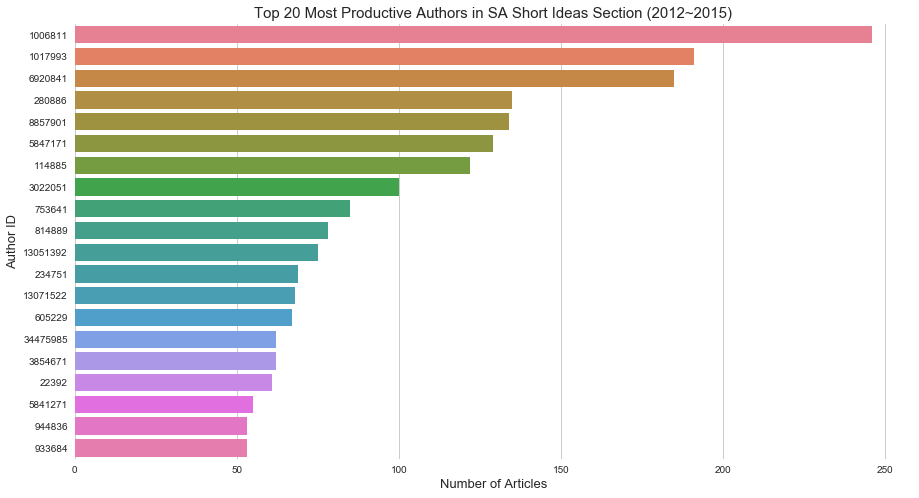

In [12]:
# Top 20 Most Productive Authors in SA Short Ideas Section (2012~2015)
import seaborn as sns
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# Load the dataset
df_author = df.author_id.value_counts().to_frame()
df_author.reset_index(inplace=True)
df_author.columns = ['author_id', 'num_articles']
order_lst = list(df_author[0:20].author_id)

# Draw a plot
sns.barplot(x="num_articles", y="author_id", data=df_author[0:20], palette="husl", orient='h', order=order_lst)
ax.set_title('Top 20 Most Productive Authors in SA Short Ideas Section (2012~2015)', fontsize=15)
ax.set_xlabel('Number of Articles', fontsize=13)
ax.set_ylabel('Author ID', fontsize=13)
sns.despine(left=True, bottom=True)


# 2. Investigation of Return Predictability of SA Short Recommendations

Now, let’s investigate the questions regarding the return predictability of short recommendations of SA one by one.

# Q1: *Do overall short recommendations of SA predict future stock returns?*

>### Motivation
If we short all the stocks recommended in short ideas section of SA, could we generate positive return (make money) on average? Let’s take a look at the performance of the short portfolio constructed using all the stocks recommended, in different holding periods from 5 to 100 trading days. The box plots below show the distribution of the holding period returns of each stock included in the short portfolio. The diamond-shaped marker inside the box indicates the average of the returns.

>### Summary of Results
* The number of short ideas article publications varies over time from 1600 to 2400 per year during the sample time period.
* Overall short recommendations of SA do not predict future returns on average. In other words, if we short all the stocks recommended in short ideas section of SA during the overall time period of our sample, we lose money on average.
* However, the performance of the short portfolio varies significantly over time. For example, 100-day holding period mean return in 2013 and 2015 is approximately -14% and +7%, respectively.

Text(0.08,0.5,'Holding Period Return')

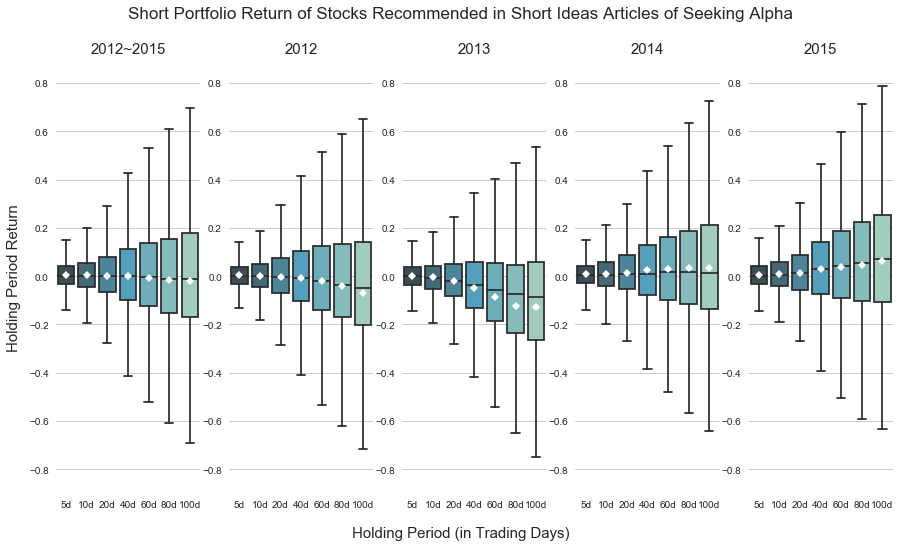

In [13]:
# Short Portfolio Return of Stocks Recommended in Short Ideas Articles of Seeking Alpha
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, (ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,8))

# Settings
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a plot
# ax1
sns.boxplot(data=-df[['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']], 
            palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax1)
ax1.set_title('2012~2015', fontsize=15)
ax1.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
ax1.set_ylim([-.9, .9]) 
sns.despine(left=True, bottom=True)

# ax2
sns.boxplot(data=-df[df.year==2012][['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']], 
            palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax2)
ax2.set_title('2012', fontsize=15)
ax2.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax3
sns.boxplot(data=-df[df.year==2013][['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax3)
ax3.set_title('2013', fontsize=15)
ax3.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax4
sns.boxplot(data=-df[df.year==2014][['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax4)
ax4.set_title('2014', fontsize=15)
ax4.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax5
sns.boxplot(data=-df[df.year==2015][['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax5)
ax5.set_title('2015', fontsize=15)
ax5.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# fig
fig.text(0.5, 0.95, 'Short Portfolio Return of Stocks Recommended in Short Ideas Articles of Seeking Alpha',
         fontsize=17, ha='center')
fig.text(0.5, 0.05, 'Holding Period (in Trading Days)', fontsize=15, ha='center')
fig.text(0.08, 0.5, 'Holding Period Return', fontsize=15, va='center', rotation='vertical')

# Q1': *Does future return predictability of SA articles varies with industry?*

In [14]:
df.sic2_name.value_counts()

Manufacturing      2439
Services           2062
Retail              975
Nonclassifiable     538
Finance             474
Mining              466
Telecom             456
Wholesale           413
Etc.                 50
Name: sic2_name, dtype: int64

Text(0,0.5,'')

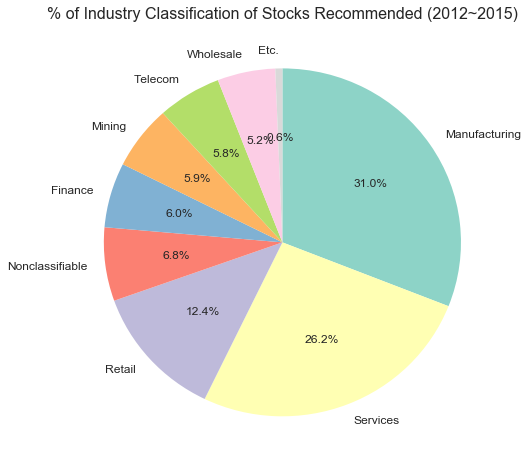

In [15]:
# % of Stock Industry (2012~2015)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 8))
colors = sns.color_palette("Set3", 10)

# Draw a plot
df.sic2_name.value_counts().plot.pie(autopct='%1.1f%%', ax=ax1, shadow=False, fontsize=12, 
                                     colors=colors, startangle=90, counterclock=False)
ax1.set_title('% of Industry Classification of Stocks Recommended (2012~2015)', fontsize=16)
ax1.set_ylabel('')  

Text(0.08,0.5,'Holding Period Return')

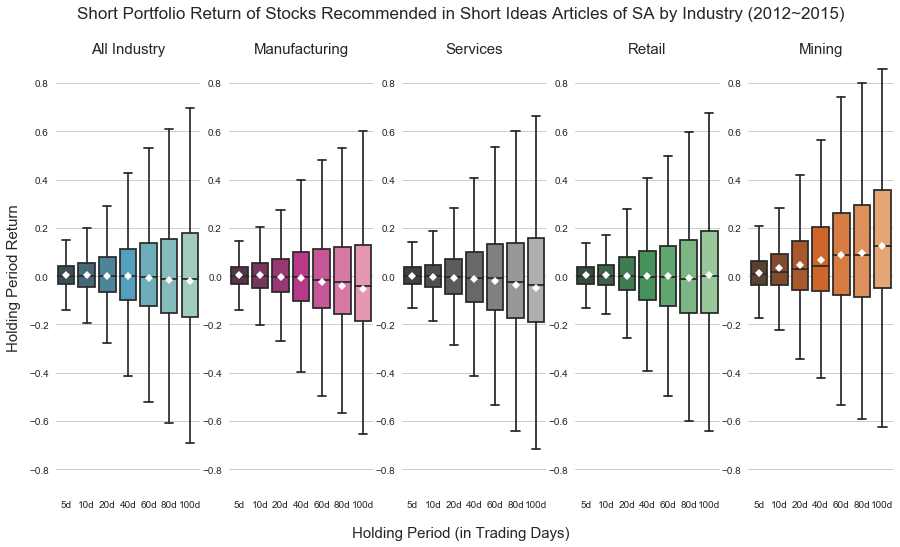

In [16]:
# Short Portfolio Return of Stocks Recommended in Short Ideas Articles of SA by Industry (2012~2015)
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, (ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,8))

# Settings
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a plot
# ax1
sns.boxplot(data=-df[['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax1)
ax1.set_title('All Industry', fontsize=15)
ax1.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
ax1.set_ylim([-.9, .9]) 
sns.despine(left=True, bottom=True)

# ax2
sns.boxplot(data=-df[df.sic2_name=='Manufacturing']
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="RdPu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax2)
ax2.set_title('Manufacturing', fontsize=15)
ax2.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax3
sns.boxplot(data=-df[df.sic2_name=='Services']
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greys_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax3)
ax3.set_title('Services', fontsize=15)
ax3.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax4
sns.boxplot(data=-df[df.sic2_name=='Retail']
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greens_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax4)
ax4.set_title('Retail', fontsize=15)
ax4.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax5
sns.boxplot(data=-df[df.sic2_name=='Mining']
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Oranges_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax5)
ax5.set_title('Mining', fontsize=15)
ax5.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# fig
fig.text(0.5, 0.95, 'Short Portfolio Return of Stocks Recommended in Short Ideas Articles of SA by Industry (2012~2015)', 
         fontsize=17, ha='center')
fig.text(0.5, 0.05, 'Holding Period (in Trading Days)', fontsize=15, ha='center')
fig.text(0.08, 0.5, 'Holding Period Return', fontsize=15, va='center', rotation='vertical')

## *Manufacturing*

In [17]:
df[df.sic2_name=='Manufacturing'].year.value_counts().sort_index()

2012    443
2013    709
2014    683
2015    604
Name: year, dtype: int64

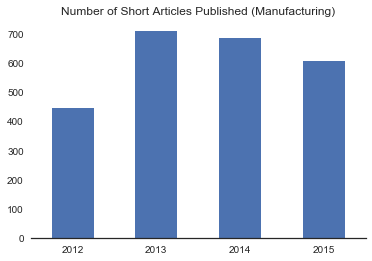

In [18]:
# Number of Short Articles Published (Manufacturing)
sns.set_style("white")
df[df.sic2_name=='Manufacturing'].year.value_counts().sort_index().plot.bar()
plt.title('Number of Short Articles Published (Manufacturing)')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=False)

In [19]:
# List of company name and number of articles
df[df.sic2_name=='Manufacturing'].company_name.value_counts()

Tesla, Inc.                                                       334
Apple Inc.                                                        205
Intel Corporation                                                  66
Nokia Corporation                                                  63
Keurig Green Mountain Inc                                          44
GoPro                                                              34
Amarin Corporation PLC                                             33
HP Inc.                                                            32
Qualcomm Inc.                                                      31
Advanced Micro Devices, Inc.                                       31
Mallinckrodt PLC                                                   28
General Motors Company                                             27
Caterpillar Inc.                                                   27
First Solar, Inc.                                                  24
ARM Holdings, plc   

Text(0.08,0.5,'Holding Period Return')

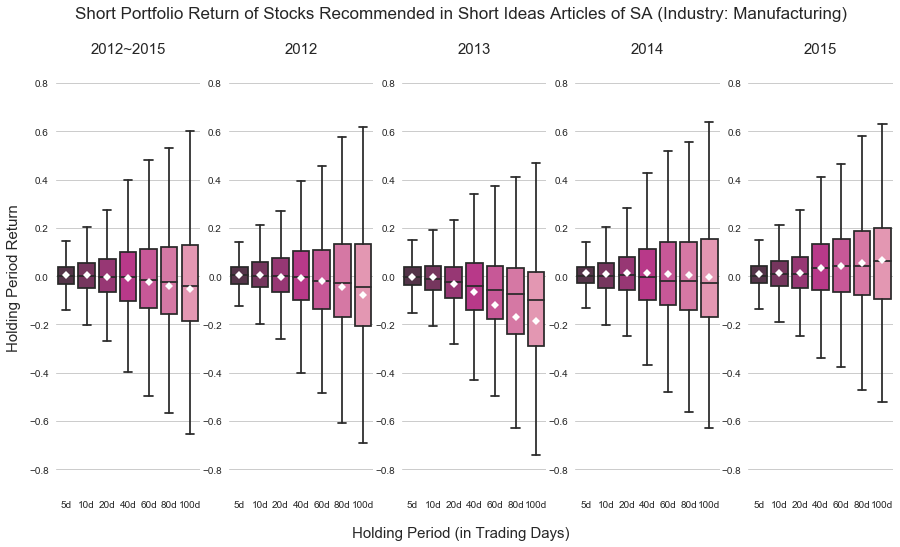

In [20]:
# Short Portfolio Return of Stocks Recommended in Short Ideas Articles of SA (Industry: Manufacturing)
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, (ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,8))

# Settings
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a plot
# ax1
sns.boxplot(data=-df[df.sic2_name=='Manufacturing']
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="RdPu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax1)
ax1.set_title('2012~2015', fontsize=15)
ax1.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
ax1.set_ylim([-.9, .9]) 
sns.despine(left=True, bottom=True)

# ax2
sns.boxplot(data=-df[(df.sic2_name=='Manufacturing')&(df.year==2012)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="RdPu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax2)
ax2.set_title('2012', fontsize=15)
ax2.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax3
sns.boxplot(data=-df[(df.sic2_name=='Manufacturing')&(df.year==2013)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="RdPu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax3)
ax3.set_title('2013', fontsize=15)
ax3.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax4
sns.boxplot(data=-df[(df.sic2_name=='Manufacturing')&(df.year==2014)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="RdPu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax4)
ax4.set_title('2014', fontsize=15)
ax4.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax5
sns.boxplot(data=-df[(df.sic2_name=='Manufacturing')&(df.year==2015)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="RdPu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax5)
ax5.set_title('2015', fontsize=15)
ax5.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

fig.text(0.5, 0.95, 
         'Short Portfolio Return of Stocks Recommended in Short Ideas Articles of SA (Industry: Manufacturing)', 
         fontsize=17, ha='center')
fig.text(0.5, 0.05, 'Holding Period (in Trading Days)', fontsize=15, ha='center')
fig.text(0.08, 0.5, 'Holding Period Return', fontsize=15, va='center', rotation='vertical')

## *Services*

In [21]:
df[df.sic2_name=='Services'].year.value_counts().sort_index()

2012    506
2013    538
2014    617
2015    401
Name: year, dtype: int64

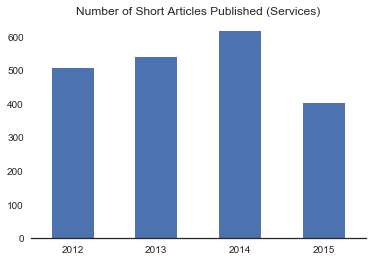

In [22]:
# Number of Short Articles Published (Services)
sns.set_style("white")
df[df.sic2_name=='Services'].year.value_counts().sort_index().plot.bar()
plt.title('Number of Short Articles Published (Services)')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=False)

In [23]:
# List of company name and number of articles
df[df.sic2_name=='Services'].company_name.value_counts()

Amazon.com, Inc.                                  324
Netflix, Inc.                                     213
Microsoft Corporation                             114
Facebook                                          112
Salesforce.com, Inc.                               72
Twitter, Inc.                                      71
3D Systems Corp.                                   64
Pandora Media                                      63
ANGI Homeservices Inc.                             44
Alphabet Inc.                                      38
Zynga                                              38
Groupon, Inc.                                      37
International Business Machines Corporation        31
Yelp                                               27
Zillow Group, Inc.                                 25
Baidu, Inc.                                        21
Shake Shack                                        18
eBay Inc.                                          16
Veeva Systems Inc.          

Text(0.08,0.5,'Holding Period Return')

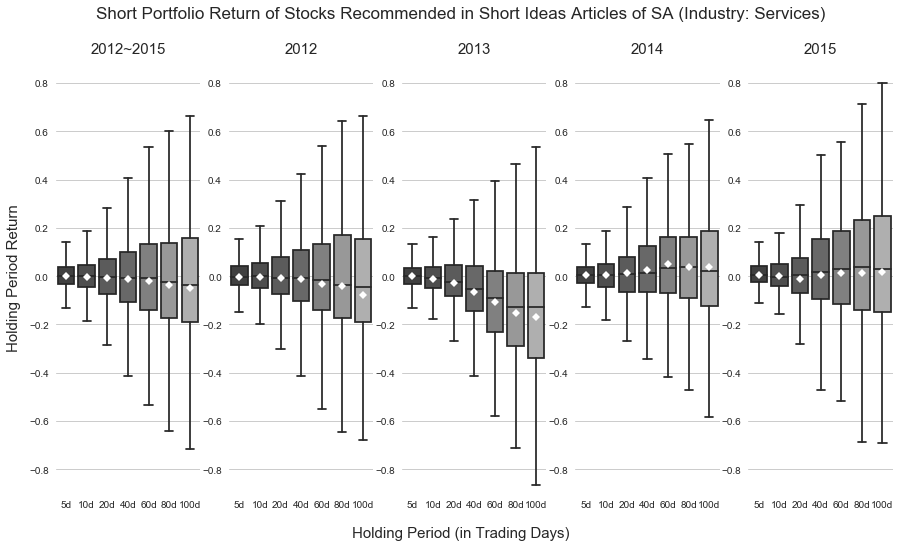

In [24]:
# Short Portfolio Return of Stocks Recommended in Short Ideas Articles of SA (Industry: Services)
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, (ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,8))

# Settings
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a plot
# ax1
sns.boxplot(data=-df[df.sic2_name=='Services']
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greys_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax1)
ax1.set_title('2012~2015', fontsize=15)
ax1.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
ax1.set_ylim([-.9, .9]) 
sns.despine(left=True, bottom=True)

# ax2
sns.boxplot(data=-df[(df.sic2_name=='Services')&(df.year==2012)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greys_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax2)
ax2.set_title('2012', fontsize=15)
ax2.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax3
sns.boxplot(data=-df[(df.sic2_name=='Services')&(df.year==2013)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greys_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax3)
ax3.set_title('2013', fontsize=15)
ax3.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax4
sns.boxplot(data=-df[(df.sic2_name=='Services')&(df.year==2014)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greys_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax4)
ax4.set_title('2014', fontsize=15)
ax4.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax5
sns.boxplot(data=-df[(df.sic2_name=='Services')&(df.year==2015)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greys_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax5)
ax5.set_title('2015', fontsize=15)
ax5.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# fig
fig.text(0.5, 0.95, 'Short Portfolio Return of Stocks Recommended in Short Ideas Articles of SA (Industry: Services)', 
         fontsize=17, ha='center')
fig.text(0.5, 0.05, 'Holding Period (in Trading Days)', fontsize=15, ha='center')
fig.text(0.08, 0.5, 'Holding Period Return', fontsize=15, va='center', rotation='vertical')

## *Retail*

In [25]:
df[df.sic2_name=='Retail'].year.value_counts().sort_index()

2012    236
2013    215
2014    274
2015    250
Name: year, dtype: int64

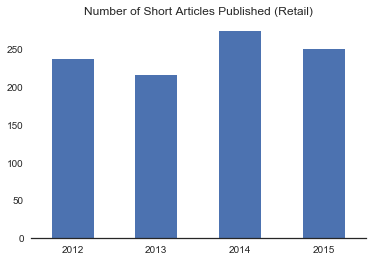

In [26]:
# Number of Short Articles Published (Retail)
sns.set_style("white")
df[df.sic2_name=='Retail'].year.value_counts().sort_index().plot.bar()
plt.title('Number of Short Articles Published (Retail)')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=False)

In [27]:
# List of company name and number of articles
df[df.sic2_name=='Retail'].company_name.value_counts()

J.C. Penney Company Inc.                    121
Chipotle Mexican Grill, Inc.                 64
Sears Holdings Corporation                   62
Lumber Liquidators Holdings, Inc.            61
McDonald's Corporation                       46
Lululemon Athletica Inc.                     44
GameStop Corp.                               34
Best Buy Co.                                 33
Starbucks Corporation                        22
Walmart Inc.                                 20
RadioShack Corporation                       20
Overstock.com, Inc.                          18
Target Corporation                           16
Yum! Brands, Inc.                            13
Abercrombie & Fitch                          13
Barnes & Noble Inc                           12
Wayfair                                      11
Aeropostale, Inc.                            11
Darden Restaurants, Inc.                     11
BJ's Restaurants, Inc.                       10
Home Depot, Inc.                        

Text(0.08,0.5,'Holding Period Return')

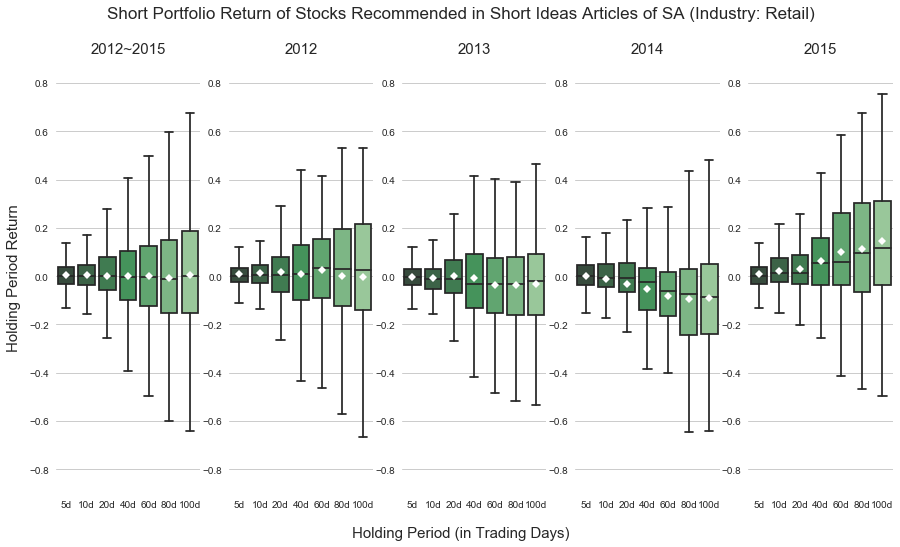

In [28]:
# Short Portfolio Return of Stocks Recommended in Short Ideas Articles of SA (Industry: Retail)
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, (ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,8))

# Settings
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a plot
# ax1
sns.boxplot(data=-df[df.sic2_name=='Retail']
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greens_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax1)
ax1.set_title('2012~2015', fontsize=15)
ax1.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
ax1.set_ylim([-.9, .9]) 
sns.despine(left=True, bottom=True)

# ax2
sns.boxplot(data=-df[(df.sic2_name=='Retail')&(df.year==2012)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greens_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax2)
ax2.set_title('2012', fontsize=15)
ax2.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax3
sns.boxplot(data=-df[(df.sic2_name=='Retail')&(df.year==2013)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greens_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax3)
ax3.set_title('2013', fontsize=15)
ax3.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax4
sns.boxplot(data=-df[(df.sic2_name=='Retail')&(df.year==2014)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greens_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax4)
ax4.set_title('2014', fontsize=15)
ax4.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax5
sns.boxplot(data=-df[(df.sic2_name=='Retail')&(df.year==2015)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Greens_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax5)
ax5.set_title('2015', fontsize=15)
ax5.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# fig
fig.text(0.5, 0.95, 'Short Portfolio Return of Stocks Recommended in Short Ideas Articles of SA (Industry: Retail)', 
         fontsize=17, ha='center')
fig.text(0.5, 0.05, 'Holding Period (in Trading Days)', fontsize=15, ha='center')
fig.text(0.08, 0.5, 'Holding Period Return', fontsize=15, va='center', rotation='vertical')

## *Mining*

In [29]:
df[df.sic2_name=='Mining'].year.value_counts().sort_index()

2012     83
2013    101
2014    160
2015    122
Name: year, dtype: int64

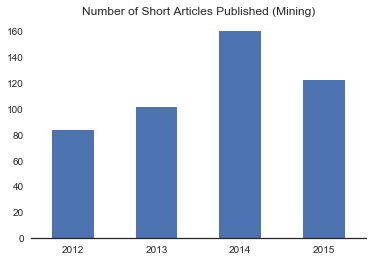

In [30]:
# Number of Short Articles Published (Mining)
sns.set_style("white")
df[df.sic2_name=='Mining'].year.value_counts().sort_index().plot.bar()
plt.title('Number of Short Articles Published (Mining)')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=False)

In [31]:
# List of company name and number of articles
df[df.sic2_name=='Mining'].company_name.value_counts()

Odyssey Marine Exploration, Inc.                32
Cleveland-Cliffs, Inc.                          20
Chesapeake Energy Corporation                   20
Barrick Gold Corporation                        15
Whiting USA Trust                               14
InterOil Corporation                            14
Vale S.A.                                       14
Freeport-McMoRan Inc.                           14
Petrobras - Petroleo Brasileiro S.A.            12
Cheniere Energy, Inc                            11
Great Northern Iron Ore Properties               9
AuRico Gold                                      9
Transocean Ltd.                                  9
Seadrill Limited                                 8
Tanzanian Royalty Exploration Corp.              8
New Gold Inc                                     8
Halcon Resources Corporation                     8
SandRidge Energy, Inc.                           8
Schlumberger Limited                             7
Primero Mining Corp. New Ordina

Text(0.08,0.5,'Holding Period Return')

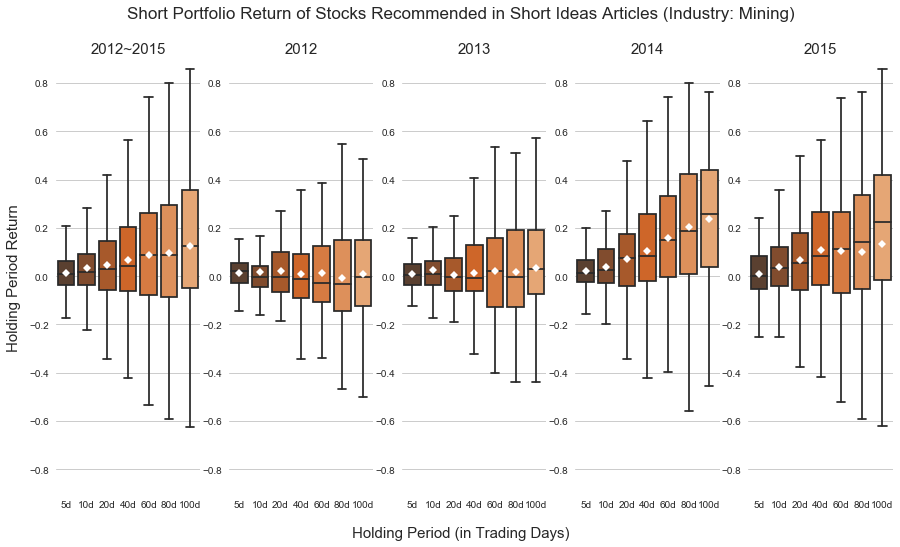

In [32]:
# Short Portfolio Return of Stocks Recommended in Short Ideas Articles (Industry: Mining)
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, (ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,8))

# Settings
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a plot
# ax1
sns.boxplot(data=-df[df.sic2_name=='Mining'][['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Oranges_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax1)
ax1.set_title('2012~2015', fontsize=15)
ax1.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
ax1.set_ylim([-.9, .9]) 
sns.despine(left=True, bottom=True)

# ax2
sns.boxplot(data=-df[(df.sic2_name=='Mining')&(df.year==2012)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Oranges_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax2)
ax2.set_title('2012', fontsize=15)
ax2.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax3
sns.boxplot(data=-df[(df.sic2_name=='Mining')&(df.year==2013)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Oranges_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax3)
ax3.set_title('2013', fontsize=15)
ax3.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax4
sns.boxplot(data=-df[(df.sic2_name=='Mining')&(df.year==2014)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Oranges_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax4)
ax4.set_title('2014', fontsize=15)
ax4.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# ax5
sns.boxplot(data=-df[(df.sic2_name=='Mining')&(df.year==2015)]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
            palette="Oranges_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax5)
ax5.set_title('2015', fontsize=15)
ax5.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))

# fig
fig.text(0.5, 0.95, 'Short Portfolio Return of Stocks Recommended in Short Ideas Articles (Industry: Mining)', 
         fontsize=17, ha='center')
fig.text(0.5, 0.05, 'Holding Period (in Trading Days)', fontsize=15, ha='center')
fig.text(0.08, 0.5, 'Holding Period Return', fontsize=15, va='center', rotation='vertical')

# Q2: *Do short recommendations of SA top opinion leaders predict future stock returns?*


>### Motivation
In question 1, we figured out that the overall short recommendations of SA do not predict future returns on average. In this section, we will narrow down the scope of the authors and investigate whether the short recommendations of the “popular” authors predict future returns. Seeking Alpha provides the list of the most read authors in the last 90 days, called opinion leaders, by topic. (For example, long ideas, short ideas etc.) Usually, they not only publish articles actively but also have many followers. Let's compare the performance of the short portfolio constructed using stocks recommended by the top 5 opinion leaders and the others.

>### Summary of Results
>***Overall time period***
* During 2012~2015, around 15.7% of the articles were published by the top 5 opinion leaders.
* Contrary to expectations, short recommendations of top 5 opinion leaders do not predict future returns on average. In other words, if we short all the stocks recommended by the top 5 opinion leaders during the overall time period of our sample, we lose money on average. 
* What is more surprising is that we lose even more by following the top 5 opinion leaders’ recommendations than all the other authors’ recommendations.   

>***By year***
* Return predictability of the short portfolio varies from year to year.
* Interestingly, the short portfolio constructed using stocks recommended by top 5 opinion leaders generates negative returns in all years, even in the years when the short portfolio constructed using stocks recommended by all other authors generates positive returns.

In [33]:
# Opinion leader data from Wayback Machine
dfl_top5 = pd.read_excel('data/opinion_leader_top5.xlsx')

In [34]:
dfl_top5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
rank             5 non-null int64
leader_2012Q1    5 non-null object
leader_2012Q2    5 non-null object
leader_2012Q3    5 non-null object
leader_2012Q4    5 non-null object
leader_2013Q1    5 non-null object
leader_2013Q2    5 non-null object
leader_2013Q3    5 non-null object
leader_2013Q4    5 non-null object
leader_2014Q1    5 non-null object
leader_2014Q2    5 non-null object
leader_2014Q3    5 non-null object
leader_2014Q4    5 non-null object
leader_2015Q1    5 non-null object
leader_2015Q2    5 non-null object
leader_2015Q3    5 non-null object
leader_2015Q4    5 non-null object
leader_2016Q1    5 non-null object
leader_2016Q2    5 non-null object
leader_2016Q3    5 non-null object
leader_2016Q4    5 non-null object
dtypes: int64(1), object(20)
memory usage: 920.0+ bytes


In [35]:
dfl_top5.head()

,rank,leader_2012Q1,leader_2012Q2,leader_2012Q3,leader_2012Q4,leader_2013Q1,leader_2013Q2,leader_2013Q3,leader_2013Q4,leader_2014Q1,leader_2014Q2,leader_2014Q3,leader_2014Q4,leader_2015Q1,leader_2015Q2,leader_2015Q3,leader_2015Q4,leader_2016Q1,leader_2016Q2,leader_2016Q3,leader_2016Q4
0,1,Paulo Santos,Paulo Santos,Bidness Etc,Bidness Etc,Ashraf Eassa,Core Equity Research,Kofi Bofah,Quoth the Raven,Quoth the Raven,Quoth the Raven,Quoth the Raven,Paulo Santos,Anton Wahlman,Shock Exchange,Paulo Santos,Paulo Santos,Anton Wahlman,Montana Skeptic,Paulo Santos,Paulo Santos
1,2,Bill Maurer,David White,Bill Maurer,Bill Maurer,Bill Maurer,Ashraf Eassa,Ashraf Eassa,Bill Maurer,Michael Blair,Michael Blair,Michael Blair,Michael Blair,Paulo Santos,Paulo Santos,Anton Wahlman,Shock Exchange,Montana Skeptic,Paulo Santos,Montana Skeptic,Montana Skeptic
2,3,Rocco Pendola,Gutone,Saibus Research,Saibus Research,Paulo Santos,Markos Kaminis,Michael Blair,Michael Blair,Bill Maurer,Don Dion,Shock Exchange,Anton Wahlman,Michael Blair,Anton Wahlman,Shock Exchange,Josh Arnold,Paulo Santos,Bill Maurer,Shock Exchange,Bill Maurer
3,4,Shmulik Karpf,Bill Maurer,Shane Blackmon,Peter Pham,Dana Blankenhorn,Bill Maurer,Bill Maurer,Don Dion,EnhydrisPECorp,The Pump Stopper,Paulo Santos,The Specialist,Brian Nichols,Whitney Tilson,Short/Long Trader,Brandon Dempster,Michael Blair,Anton Wahlman,Anton Wahlman,Shock Exchange
4,5,Takeover Analyst,Richard Saintvilus,Paulo Santos,Modernist,David White,Paulo Santos,Richard Pearson,Seeking Profits,Seeking Profits,Bill Maurer,Don Dion,Shock Exchange,Matt Stewart,Logical Thought,Orange Peel Investments,Anton Wahlman,Shock Exchange,Mark Hibben,Orange Peel Investments,Orange Peel Investments


## Q2: Overall time period

Text(0,0.5,'')

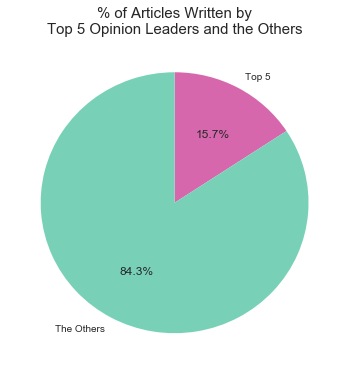

In [36]:
# % of Articles Written by Top 5 Opinion Leaders
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(6, 6))

# Data to plot
num_top5 = len(df[((df.yr_qt_str=='2012Q1')&(df.author_name.isin(dfl_top5['leader_2012Q1'])))
                    |((df.yr_qt_str=='2012Q2')&(df.author_name.isin(dfl_top5['leader_2012Q2'])))
                    |((df.yr_qt_str=='2012Q3')&(df.author_name.isin(dfl_top5['leader_2012Q3'])))
                    |((df.yr_qt_str=='2012Q4')&(df.author_name.isin(dfl_top5['leader_2012Q4'])))
                    |((df.yr_qt_str=='2013Q1')&(df.author_name.isin(dfl_top5['leader_2013Q1'])))
                    |((df.yr_qt_str=='2013Q2')&(df.author_name.isin(dfl_top5['leader_2013Q2'])))
                    |((df.yr_qt_str=='2013Q3')&(df.author_name.isin(dfl_top5['leader_2013Q3'])))
                    |((df.yr_qt_str=='2013Q4')&(df.author_name.isin(dfl_top5['leader_2013Q4'])))
                    |((df.yr_qt_str=='2014Q1')&(df.author_name.isin(dfl_top5['leader_2014Q1'])))
                    |((df.yr_qt_str=='2014Q2')&(df.author_name.isin(dfl_top5['leader_2014Q2'])))
                    |((df.yr_qt_str=='2014Q3')&(df.author_name.isin(dfl_top5['leader_2014Q3'])))
                    |((df.yr_qt_str=='2014Q4')&(df.author_name.isin(dfl_top5['leader_2014Q4'])))
                    |((df.yr_qt_str=='2015Q1')&(df.author_name.isin(dfl_top5['leader_2015Q1'])))
                    |((df.yr_qt_str=='2015Q2')&(df.author_name.isin(dfl_top5['leader_2015Q2'])))
                    |((df.yr_qt_str=='2015Q3')&(df.author_name.isin(dfl_top5['leader_2015Q3'])))
                    |((df.yr_qt_str=='2015Q4')&(df.author_name.isin(dfl_top5['leader_2015Q4'])))])

num_nontop5 = len(df[((df.yr_qt_str=='2012Q1')&(~df.author_name.isin(dfl_top5['leader_2012Q1'])))
                    |((df.yr_qt_str=='2012Q2')&(~df.author_name.isin(dfl_top5['leader_2012Q2'])))
                    |((df.yr_qt_str=='2012Q3')&(~df.author_name.isin(dfl_top5['leader_2012Q3'])))
                    |((df.yr_qt_str=='2012Q4')&(~df.author_name.isin(dfl_top5['leader_2012Q4'])))
                    |((df.yr_qt_str=='2013Q1')&(~df.author_name.isin(dfl_top5['leader_2013Q1'])))
                    |((df.yr_qt_str=='2013Q2')&(~df.author_name.isin(dfl_top5['leader_2013Q2'])))
                    |((df.yr_qt_str=='2013Q3')&(~df.author_name.isin(dfl_top5['leader_2013Q3'])))
                    |((df.yr_qt_str=='2013Q4')&(~df.author_name.isin(dfl_top5['leader_2013Q4'])))
                    |((df.yr_qt_str=='2014Q1')&(~df.author_name.isin(dfl_top5['leader_2014Q1'])))
                    |((df.yr_qt_str=='2014Q2')&(~df.author_name.isin(dfl_top5['leader_2014Q2'])))
                    |((df.yr_qt_str=='2014Q3')&(~df.author_name.isin(dfl_top5['leader_2014Q3'])))
                    |((df.yr_qt_str=='2014Q4')&(~df.author_name.isin(dfl_top5['leader_2014Q4'])))
                    |((df.yr_qt_str=='2015Q1')&(~df.author_name.isin(dfl_top5['leader_2015Q1'])))
                    |((df.yr_qt_str=='2015Q2')&(~df.author_name.isin(dfl_top5['leader_2015Q2'])))
                    |((df.yr_qt_str=='2015Q3')&(~df.author_name.isin(dfl_top5['leader_2015Q3'])))
                    |((df.yr_qt_str=='2015Q4')&(~df.author_name.isin(dfl_top5['leader_2015Q4'])))])

sizes = [num_top5, num_nontop5]
labels = ['Top 5', 'The Others']
colors = ["#d767ad", "#78d1b6"]

# Draw a plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90, counterclock=False)
ax1.set_title('% of Articles Written by\nTop 5 Opinion Leaders and the Others', fontsize=15)
ax1.set_ylabel('') 


Text(0.045,0.5,'Holding Period Return')

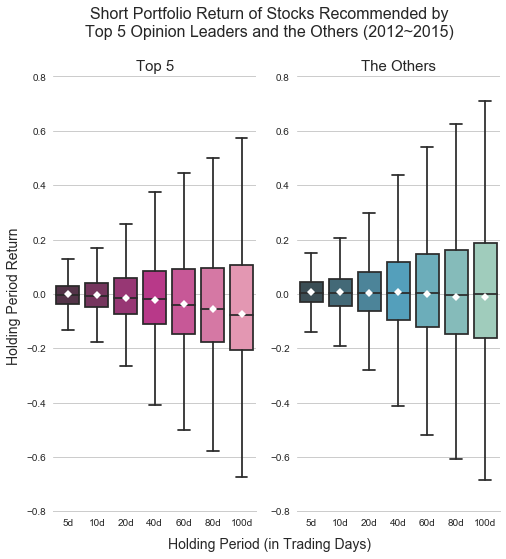

In [37]:
# Top5 Opinion Leaders vs. Non-top5 (2012~2015)
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, ((ax1, ax2))= plt.subplots(nrows=1, ncols=2, figsize=(8,8))

# Settings
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')
ylim_lower = -.8
ylim_upper = .8

# Draw a plot
# ax1
sns.boxplot(data=-df[((df.yr_qt_str=='2012Q1')&(df.author_name.isin(dfl_top5['leader_2012Q1'])))
                    |((df.yr_qt_str=='2012Q2')&(df.author_name.isin(dfl_top5['leader_2012Q2'])))
                    |((df.yr_qt_str=='2012Q3')&(df.author_name.isin(dfl_top5['leader_2012Q3'])))
                    |((df.yr_qt_str=='2012Q4')&(df.author_name.isin(dfl_top5['leader_2012Q4'])))
                    |((df.yr_qt_str=='2013Q1')&(df.author_name.isin(dfl_top5['leader_2013Q1'])))
                    |((df.yr_qt_str=='2013Q2')&(df.author_name.isin(dfl_top5['leader_2013Q2'])))
                    |((df.yr_qt_str=='2013Q3')&(df.author_name.isin(dfl_top5['leader_2013Q3'])))
                    |((df.yr_qt_str=='2013Q4')&(df.author_name.isin(dfl_top5['leader_2013Q4'])))
                    |((df.yr_qt_str=='2014Q1')&(df.author_name.isin(dfl_top5['leader_2014Q1'])))
                    |((df.yr_qt_str=='2014Q2')&(df.author_name.isin(dfl_top5['leader_2014Q2'])))
                    |((df.yr_qt_str=='2014Q3')&(df.author_name.isin(dfl_top5['leader_2014Q3'])))
                    |((df.yr_qt_str=='2014Q4')&(df.author_name.isin(dfl_top5['leader_2014Q4'])))
                    |((df.yr_qt_str=='2015Q1')&(df.author_name.isin(dfl_top5['leader_2015Q1'])))
                    |((df.yr_qt_str=='2015Q2')&(df.author_name.isin(dfl_top5['leader_2015Q2'])))
                    |((df.yr_qt_str=='2015Q3')&(df.author_name.isin(dfl_top5['leader_2015Q3'])))
                    |((df.yr_qt_str=='2015Q4')&(df.author_name.isin(dfl_top5['leader_2015Q4'])))]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']], 
            palette="RdPu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax1)
ax1.set_title('Top 5', fontsize=15)
ax1.set_ylim([ylim_lower, ylim_upper])
ax1.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
sns.despine(left=True, bottom=False)

# ax2
sns.boxplot(data=-df[((df.yr_qt_str=='2012Q1')&(~df.author_name.isin(dfl_top5['leader_2012Q1'])))
                    |((df.yr_qt_str=='2012Q2')&(~df.author_name.isin(dfl_top5['leader_2012Q2'])))
                    |((df.yr_qt_str=='2012Q3')&(~df.author_name.isin(dfl_top5['leader_2012Q3'])))
                    |((df.yr_qt_str=='2012Q4')&(~df.author_name.isin(dfl_top5['leader_2012Q4'])))
                    |((df.yr_qt_str=='2013Q1')&(~df.author_name.isin(dfl_top5['leader_2013Q1'])))
                    |((df.yr_qt_str=='2013Q2')&(~df.author_name.isin(dfl_top5['leader_2013Q2'])))
                    |((df.yr_qt_str=='2013Q3')&(~df.author_name.isin(dfl_top5['leader_2013Q3'])))
                    |((df.yr_qt_str=='2013Q4')&(~df.author_name.isin(dfl_top5['leader_2013Q4'])))
                    |((df.yr_qt_str=='2014Q1')&(~df.author_name.isin(dfl_top5['leader_2014Q1'])))
                    |((df.yr_qt_str=='2014Q2')&(~df.author_name.isin(dfl_top5['leader_2014Q2'])))
                    |((df.yr_qt_str=='2014Q3')&(~df.author_name.isin(dfl_top5['leader_2014Q3'])))
                    |((df.yr_qt_str=='2014Q4')&(~df.author_name.isin(dfl_top5['leader_2014Q4'])))
                    |((df.yr_qt_str=='2015Q1')&(~df.author_name.isin(dfl_top5['leader_2015Q1'])))
                    |((df.yr_qt_str=='2015Q2')&(~df.author_name.isin(dfl_top5['leader_2015Q2'])))
                    |((df.yr_qt_str=='2015Q3')&(~df.author_name.isin(dfl_top5['leader_2015Q3'])))
                    |((df.yr_qt_str=='2015Q4')&(~df.author_name.isin(dfl_top5['leader_2015Q4'])))]
            [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']], 
            palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax2) 
ax2.set_title('The Others', fontsize=15)
ax2.set_ylim([ylim_lower, ylim_upper])
ax2.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))    

# fig
fig.text(0.5, 0.95, 'Short Portfolio Return of Stocks Recommended by\nTop 5 Opinion Leaders and the Others (2012~2015)', fontsize=16, ha='center')
fig.text(0.5, 0.06, 'Holding Period (in Trading Days)', fontsize=14, ha='center')
fig.text(0.045, 0.5, 'Holding Period Return', fontsize=14, va='center', rotation='vertical')


## Q2: By year

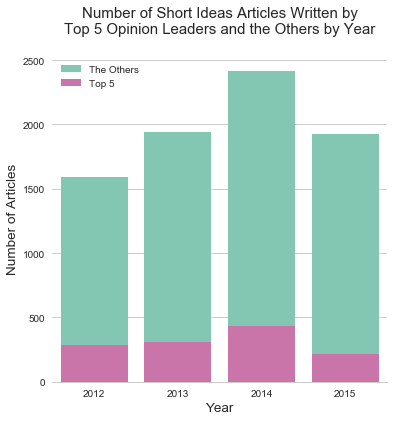

In [38]:
# Number of Short Ideas Articles Written by Top 5 Opinion Leaders by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Load the dataset
num_articles_all = list(df.year.value_counts().sort_index())
num_articles_top5 = []
yr_lst = [2012, 2013, 2014, 2015]
for i in range(4):
    num_articles_top5.append(len(df[((df.yr_qt_str==str(yr_lst[i])+'Q1')&(df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q1'])))
                                    |((df.yr_qt_str==str(yr_lst[i])+'Q2')&(df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q2'])))
                                    |((df.yr_qt_str==str(yr_lst[i])+'Q3')&(df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q3'])))
                                    |((df.yr_qt_str==str(yr_lst[i])+'Q4')&(df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q4'])))]))
df5 = pd.DataFrame({'yr': yr_lst, 'num_articles_all': num_articles_all, 'num_articles_top5': num_articles_top5})

# Plot the total number of articles
sns.barplot(x="yr", y="num_articles_all", data=df5, label="The Others", color="#78d1b6")

# Plot the number of articles written by top 5 opinion leaders
sns.barplot(x="yr", y="num_articles_top5", data=df5, label="Top 5", color="#d767ad")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set_title("Number of Short Ideas Articles Written by\nTop 5 Opinion Leaders and the Others by Year\n", fontsize=15)
ax.set_xlabel("Year", fontsize=13.5)
ax.set_ylabel("Number of Articles", fontsize=13.5)
sns.despine(left=True, bottom=False)

Text(0.07,0.5,'Holding Period Return')

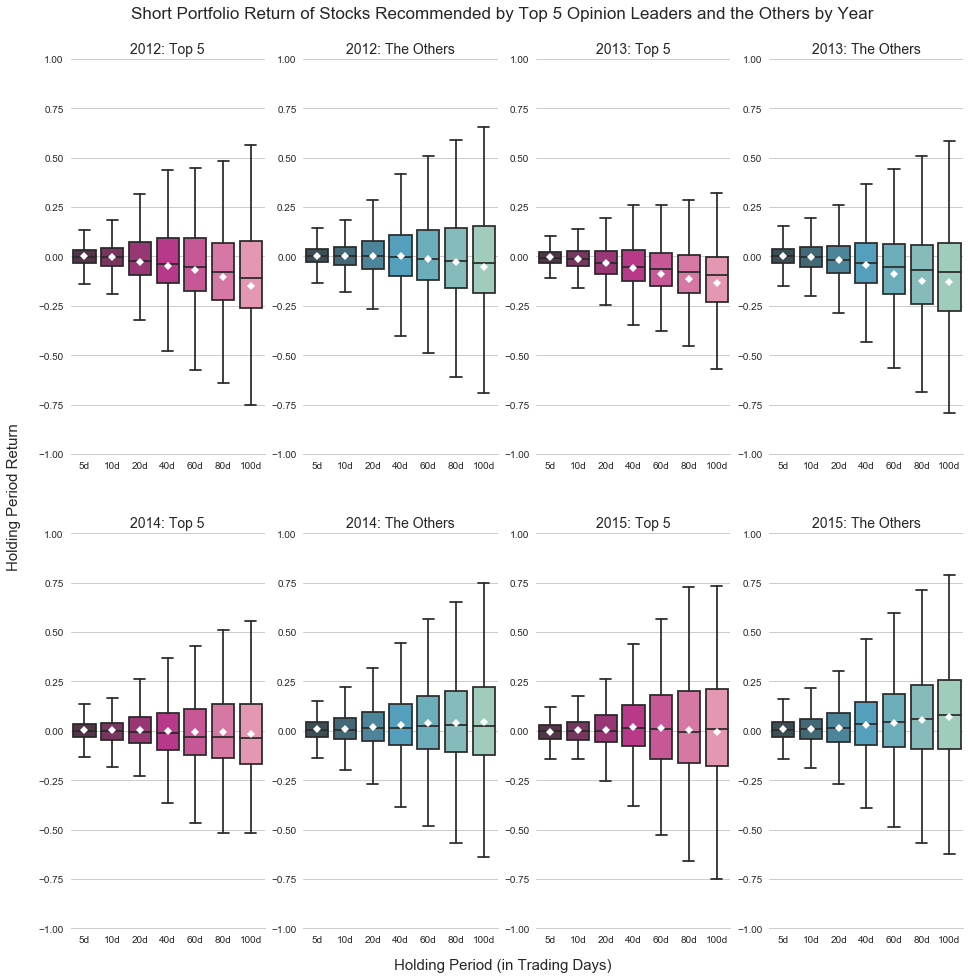

In [39]:
# Top5 Opinion Leaders vs. Non-top5 by Year
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

# Initialize the matplotlib figure
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8))= plt.subplots(nrows=2, ncols=4, figsize=(16,16))

# Settings
yr_lst = [2012, 2012, 2013, 2013, 2014, 2014, 2015, 2015]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a plot
for i, ax in enumerate(fig.axes):
    if i%2 == 0:
        sns.boxplot(data=-df[((df.yr_qt_str==str(yr_lst[i])+'Q1')&(df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q1'])))
                           |((df.yr_qt_str==str(yr_lst[i])+'Q2')&(df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q2'])))
                           |((df.yr_qt_str==str(yr_lst[i])+'Q3')&(df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q3'])))
                           |((df.yr_qt_str==str(yr_lst[i])+'Q4')&(df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q4'])))]\
                   [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']], 
                   palette="RdPu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax) 
        ax.set_title(str(str(yr_lst[i]))+': Top 5' , fontsize=14)
        ax.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))    
        ax.set_ylim([-1, 1])
        sns.despine(left=True, bottom=False)
    else:
        sns.boxplot(data=-df[((df.yr_qt_str==str(yr_lst[i])+'Q1')&(~df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q1'])))
                           |((df.yr_qt_str==str(yr_lst[i])+'Q2')&(~df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q2'])))
                           |((df.yr_qt_str==str(yr_lst[i])+'Q3')&(~df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q3'])))
                           |((df.yr_qt_str==str(yr_lst[i])+'Q4')&(~df.author_name.isin(dfl_top5['leader_'+str(yr_lst[i])+'Q4'])))]\
                   [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']], 
                   palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax)          
        ax.set_title(str(str(yr_lst[i]))+': The Others', fontsize=14)
        ax.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))    
        ax.set_ylim([-1, 1])
        sns.despine(left=True, bottom=False)
    
fig.text(0.5, 0.915, 'Short Portfolio Return of Stocks Recommended by Top 5 Opinion Leaders and the Others by Year', 
         fontsize=17, ha='center')
fig.text(0.5, 0.09, 'Holding Period (in Trading Days)', fontsize=15, ha='center')
fig.text(0.07, 0.5, 'Holding Period Return', fontsize=15, va='center', rotation='vertical') 

# Q3: *Do short recommendations of SA Editors’ Pick Articles predict future stock returns?*

>### Motivation
Up until now, we saw that both overall short recommendations and the ones from popular authors do not predict future returns on average. This section tries to find the information that can distinguish the recommendations that predict the future return from the others. If you take a look at the articles of SA closely, you will find some of them are marked as “Editors’ Pick”. According to SA, "Editors’ Picks represent what our editorial staff believes to be the most convincing and actionable analysis of the day." Then, wouldn’t it be possible that the short recommendations of the articles picked by the experienced investors (editors) as superior analyses predict future returns? Let's investigate the performance of the stocks recommended in those articles and see if the editors distinguish the good analyses from others.

>### Summary of Results
>***Overall time period***
* During 2012~2015, around 11.3% of the articles were selected as “Editors’ Pick”.
* Contrary to expectations, short recommendations of Editors’ Pick articles do not predict future returns on average. In other words, if we short all the stocks recommended in the Editors’ Pick articles during the overall time period of our sample, we lose money on average.
* What is more surprising is that we lose even more by following the recommendations of Editors’ Pick articles than that of all the other articles.

>***By year***
* Performance of the short portfolios varies from year to year.



## Q3: Overall time period

In [40]:
df.editors_pick.value_counts()

False    6982
True      891
Name: editors_pick, dtype: int64

Text(0,0.5,'')

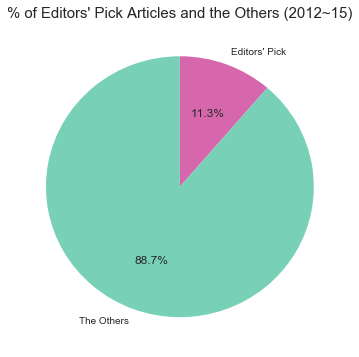

In [41]:
# % of Editors' Pick Articles (2012~15)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(6, 6))

# Data to plot
sizes = [df.editors_pick.value_counts()[1], df.editors_pick.value_counts()[0]]
labels = ["Editors' Pick", "The Others"]
colors = ["#d767ad", "#78d1b6"]

# Draw a plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90, counterclock=False)
ax1.set_title("% of Editors' Pick Articles and the Others (2012~15)", fontsize=15)
ax1.set_ylabel('') 


Text(0.045,0.5,'Holding Period Return')

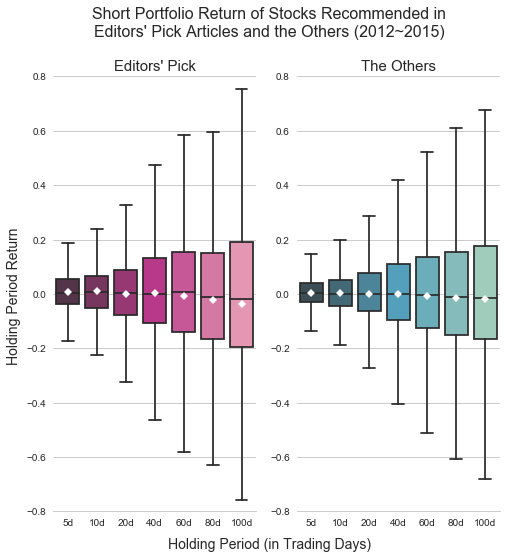

In [42]:
# Editors' Pick vs. Non Editors' Pick (2012~2015)
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, ((ax1, ax2))= plt.subplots(nrows=1, ncols=2, figsize=(8,8))

# Settings
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')
ylim_lower = -.8
ylim_upper = .8

# Draw a plot
# ax1
sns.boxplot(data=-df[df.editors_pick==True][['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
           palette="RdPu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax1)
ax1.set_title('Editors\' Pick', fontsize=15)
ax1.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
ax1.set_ylim([ylim_lower, ylim_upper])
sns.despine(left=True, bottom=False)

# ax2
sns.boxplot(data=-df[df.editors_pick==False][['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
           palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax2)
ax2.set_title('The Others', fontsize=15)
ax2.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))    
ax2.set_ylim([ylim_lower, ylim_upper])

fig.text(0.5, 0.95, 
         "Short Portfolio Return of Stocks Recommended in\nEditors' Pick Articles and the Others (2012~2015)", 
         fontsize=16, ha='center')
fig.text(0.5, 0.06, 'Holding Period (in Trading Days)', fontsize=14, ha='center')
fig.text(0.045, 0.5, 'Holding Period Return', fontsize=14, va='center', rotation='vertical')


## Q3: By year

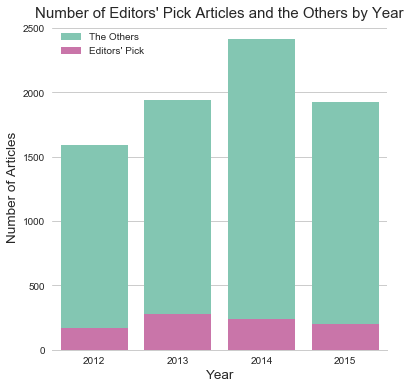

In [43]:
# Number of Editors' Pick Articles by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Load the dataset
yr = [2012, 2013, 2014, 2015]
total = list(df.year.value_counts().sort_index())
editors_pick = list(df[df.editors_pick==True].year.value_counts().sort_index())
df_ep = pd.DataFrame({'yr':yr, 'total':total, 'editors_pick':editors_pick})

# Plot the total number of articles
sns.barplot(x="yr", y="total", data=df_ep, label="The Others", color="#78d1b6")

# Plot the number of Editors' Pick articles
sns.barplot(x="yr", y="editors_pick", data=df_ep, label="Editors' Pick", color="#d767ad")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set_title("Number of Editors' Pick Articles and the Others by Year", fontsize=15)
ax.set_xlabel("Year", fontsize=13.5)
ax.set_ylabel("Number of Articles", fontsize=13.5)
sns.despine(left=True, bottom=False)

Text(0.07,0.5,'Holding Period Return')

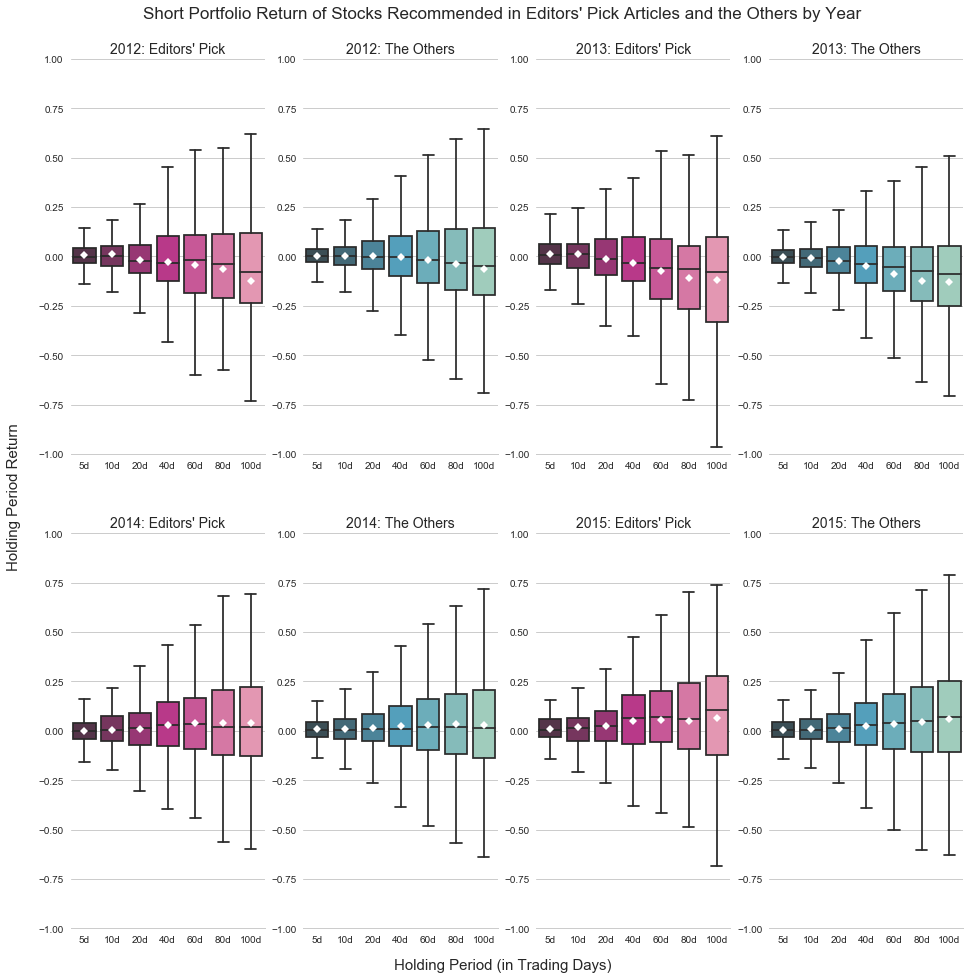

In [44]:
# Editors' Pick vs. Non Editors' Pick by Year
import seaborn as sns
sns.set_style("whitegrid")

# Initialize the matplotlib figure
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8))\
= plt.subplots(nrows=2, ncols=4, figsize=(16,16))

# Settings
yr_lst = [2012, 2012, 2013, 2013, 2014, 2014, 2015, 2015]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a plot
for i, ax in enumerate(fig.axes):
    if (i+1)%2==1:
        sns.boxplot(data=-df[(df.date.dt.year==yr_lst[i])&(df.editors_pick==(i+1)%2)]
               [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']], 
               palette="RdPu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax)
        ax.set_title(str(yr_lst[i])+': Editors\' Pick', fontsize=14)
    else:
        sns.boxplot(data=-df[(df.date.dt.year==yr_lst[i])&(df.editors_pick==(i+1)%2)]
               [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']], 
               palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax)
        ax.set_title(str(yr_lst[i])+': The Others', fontsize=14)
    ax.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))    
    ax.set_ylim([-1, 1])
    sns.despine(left=True, bottom=False)
    
fig.text(0.5, 0.915, "Short Portfolio Return of Stocks Recommended in Editors' Pick Articles and the Others by Year", 
         fontsize=17, ha='center')
fig.text(0.5, 0.09, 'Holding Period (in Trading Days)', fontsize=15, ha='center')
fig.text(0.07, 0.5, 'Holding Period Return', fontsize=15, va='center', rotation='vertical') 

# Q4: *Do short recommendations of SA from authors that have sold short the stock predict future stock returns?*

>### Motivation
In order to maintain the reliability of the articles, authors of Seeking Alpha are required to disclose personal positions in stocks they write about. Through EDA, I was able to figure out that there are 4 different disclosure categories as follows.
>
* **Short**: Author is short the stock mentioned.
* **Long**: Author is long the *competitor* of the stock mentioned.
* **No Position But May**: Author has no positions in any stocks mentioned, but may initiate positions within the next 72 hours. 
* **No Position No Plan**: Author has no position in any stocks mentioned, and no plans to initiate any positions within the next 72 hours.

>If the authors recommend shorting the stock that they have sold short, the readers naturally consider it as a sign of confidence on their prediction and think their analysis is trustworthy. But are there any grounds for this belief? Let’s find out whether their short recommendations predict future returns and better than the others’.

>### Summary of Results
>***Overall time period***
* During 2012~2015, authors recommend stocks they have sold short (named “Short” disclosure category) approximately in one third of all articles.
* Ignoring the shorting fee, those articles do predict future returns on average. In other words, if we short all the stocks that authors have sold short during the overall time period of our sample, we generate positive return on average. 
* However, if we short all the other stocks that authors have not sold short (“Long”, “No Position But May” and “No Position No Plan”), we generate negative returns on average. 

>***By year***
* Return predictability varies over time. In some years, the short portfolio of “Short” disclosure category generates positive returns but sometimes not.
* Interesting thing is that the short portfolio of “Short” disclosure category consistently outperforms all the other categories every year.

>***By year-quarter***
* In quarterly data, “Short” disclosure category (red line) outperforms all the other categories in 10 out of 16 year-quarters and performs the second best in 3 out of 16 year-quarters.




## Q4: Overall time period

In [45]:
df.disclosure_cat.value_counts()

No Position No Plan    4055
Short                  2597
Long                    558
No Position But May     502
n/a                     161
Name: disclosure_cat, dtype: int64

Text(0,0.5,'')

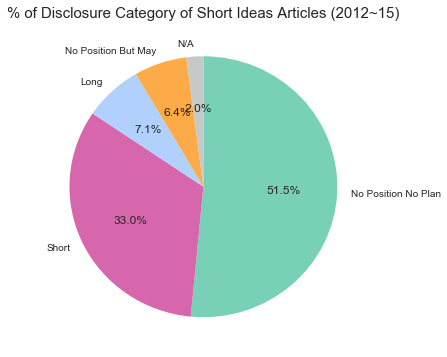

In [46]:
# % by Disclosure Category (2012~2015)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(6, 6))

#Data to plot
sizes = [df.disclosure_cat.value_counts()[i] for i in range(5)]
labels = ["No Position No Plan", "Short", "Long", "No Position But May", "N/A"]
colors = ["#78d1b6", "#d767ad", '#b1d1fc', '#fdaa48', '#c5c9c7']

# Draw a plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90, counterclock=False)
ax1.set_title("% of Disclosure Category of Short Ideas Articles (2012~15)", fontsize=15)
ax1.set_ylabel('') 

Text(0.08,0.5,'Holding Period Return')

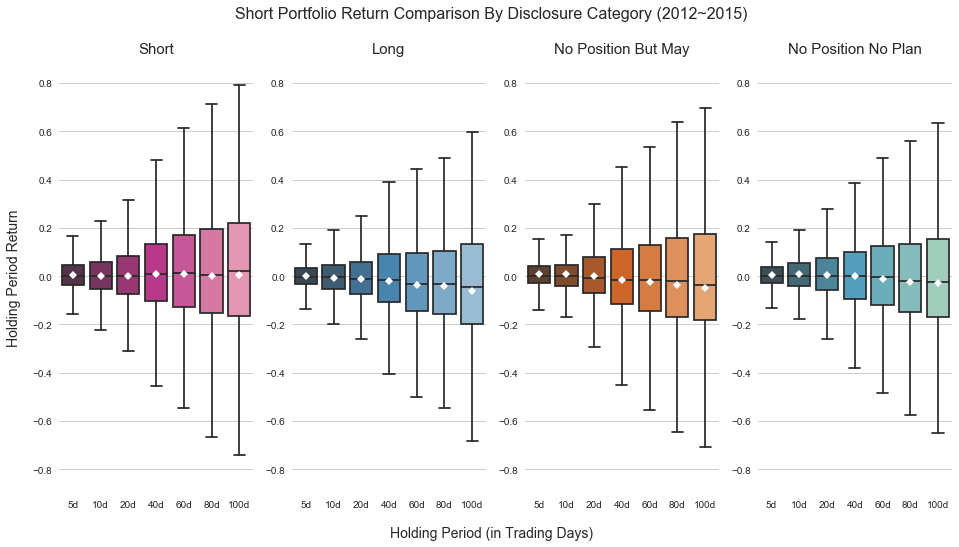

In [47]:
# By Disclosure Category (2012~2015)
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, ((ax1, ax2, ax3, ax4))= plt.subplots(nrows=1, ncols=4, figsize=(16,8))

# Settings
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')
disclosure_cat = ['Short', 'Long', 'No Position But May', 'No Position No Plan']
my_palette = ['RdPu_d', 'Blues_d', 'Oranges_d', 'GnBu_d']

# Draw a plot
for i, ax in enumerate(fig.axes):
    sns.boxplot(data=-df[df.disclosure_cat==disclosure_cat[i]]\
               [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
               palette=my_palette[i], fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax)
    ax.set_title(disclosure_cat[i], fontsize=15)
    ylim_lower = -.9
    ylim_upper = .9
    ax.set_ylim([ylim_lower, ylim_upper])
    ax.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
    sns.despine(left=True, bottom=True)

fig.text(0.5, 0.95, 'Short Portfolio Return Comparison By Disclosure Category (2012~2015)', 
         fontsize=16, ha='center')
fig.text(0.5, 0.05, 'Holding Period (in Trading Days)', fontsize=14, ha='center')
fig.text(0.08, 0.5, 'Holding Period Return', fontsize=14, va='center', rotation='vertical')


## Q4: By year
It is interesting that disclosure information of author’s short position is actually related to the future return predictability but is it consistent over time? Let’s compare the performance of short portfolios of different disclosure category each year.

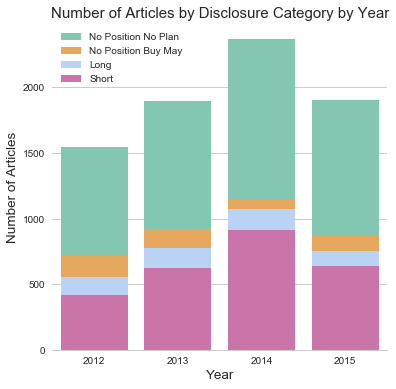

In [48]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Load the dataset
yr = [2012, 2013, 2014, 2015]
na = list(df.year.value_counts().sort_index())
no_plan = list(df[df.disclosure_cat=='No Position No Plan'].year.value_counts().sort_index())
but_may = list(df[df.disclosure_cat=='No Position But May'].year.value_counts().sort_index())
long = list(df[df.disclosure_cat=='Long'].year.value_counts().sort_index())
short = list(df[df.disclosure_cat=='Short'].year.value_counts().sort_index())
df_dis = pd.DataFrame({'yr':yr, 'na':na, 'no_plan':[sum(x) for x in zip(short, long, but_may, no_plan)],
                       'but_may':[sum(x) for x in zip(short, long, but_may)],
                       'long':[sum(x) for x in zip(short, long)], 'short':short})
# Draw a plot
sns.barplot(x="yr", y="no_plan", data=df_dis, label="No Position No Plan", color="#78d1b6")
sns.barplot(x="yr", y="but_may", data=df_dis, label="No Position Buy May", color="#fdaa48")
sns.barplot(x="yr", y="long", data=df_dis, label="Long", color="#b1d1fc")
sns.barplot(x="yr", y="short", data=df_dis, label="Short", color="#d767ad")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set_title("Number of Articles by Disclosure Category by Year", fontsize=15)
ax.set_xlabel("Year", fontsize=13.5)
ax.set_ylabel("Number of Articles", fontsize=13.5)
sns.despine(left=True, bottom=False)

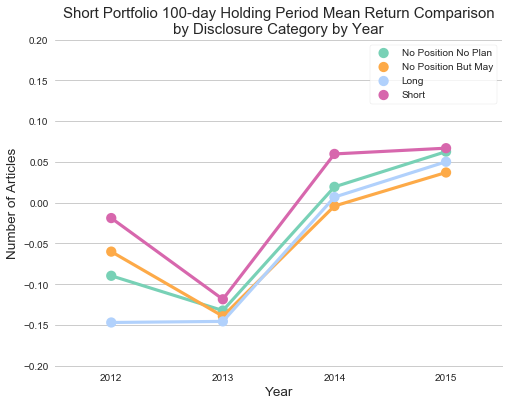

In [49]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load the dataset
yr = [2012, 2013, 2014, 2015]
dfa = -df.groupby(['disclosure_cat', 'year'])['100d_ret'].mean()
no_plan = list(dfa[8:12])
but_may = list(dfa[4:8])
long = list(dfa[0:4])
short = list(dfa[12:16])
df_dis = pd.DataFrame({'yr':yr, 'No Position No Plan':no_plan, 'No Position But May':but_may, 
                       'Long':long, 'Short':short})
df_dis = df_dis.melt('yr', var_name='Disclosure Category',  value_name='vals')

# Settings
palette = ["#78d1b6", "#fdaa48", "#b1d1fc", "#d767ad"]
order = ['No Position No Plan', 'No Position But May', 'Long', 'Short']

# Draw a plot
g1 = sns.factorplot(x="yr", y="vals", hue='Disclosure Category', hue_order=order, data=df_dis, palette=palette, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper right", frameon=True)
ax1.set_title("Short Portfolio 100-day Holding Period Mean Return Comparison\nby Disclosure Category by Year", fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("Number of Articles", fontsize=13.5)
ax1.set_ylim([-.2, .2])
sns.despine(ax=ax1, left=True, bottom=False)
plt.close(g1.fig)

Text(0.075,0.5,'Holding Period Return')

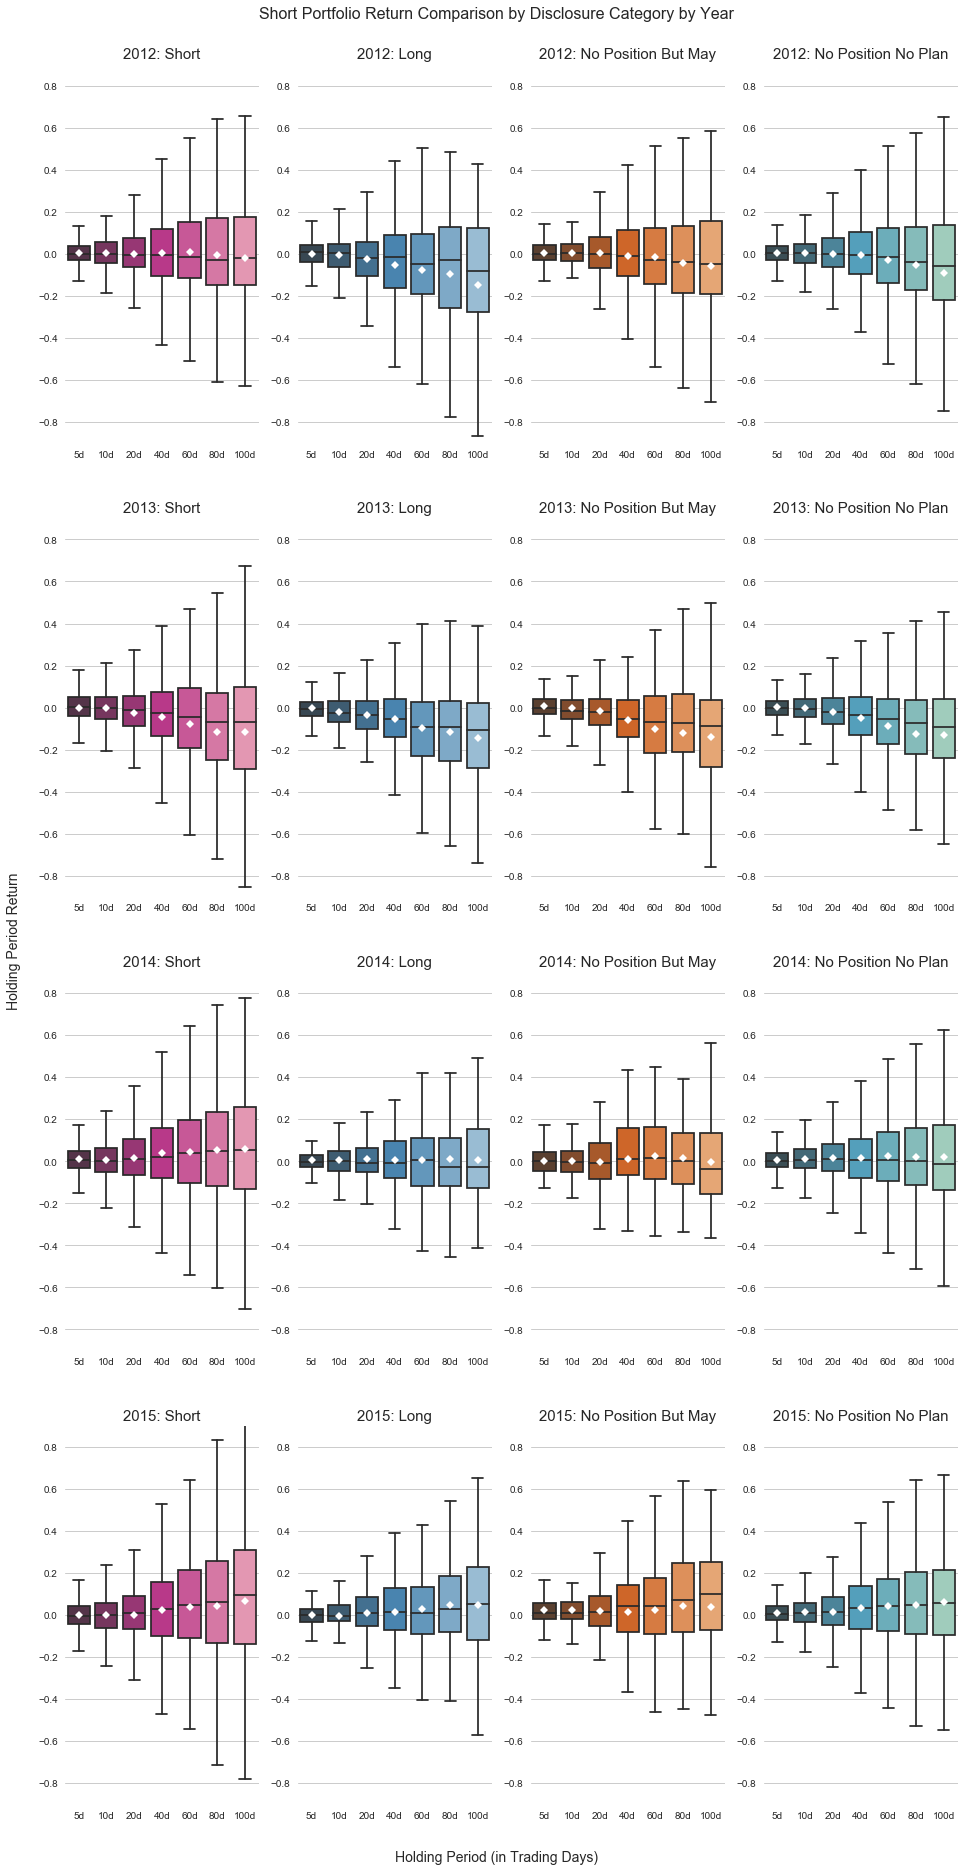

In [50]:
# By Disclosure Category by Year
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8),(ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=4, ncols=4, figsize=(16,32))

# Settings
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')
yr_lst = [2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015]
disclosure_cat = ['Short', 'Long', 'No Position But May', 'No Position No Plan']
my_palette = ['RdPu_d', 'Blues_d', 'Oranges_d', 'GnBu_d']

# Draw a plot
for i, ax in enumerate(fig.axes):
    sns.boxplot(data=-df[(df.year==yr_lst[i])&(df.disclosure_cat==disclosure_cat[i%4])]
               [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
               palette=my_palette[i%4], fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax)
    ax.set_title(str(yr_lst[i])+': '+disclosure_cat[i%4], fontsize=15)
    ax.set_ylim([-.9, .9])
    ax.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
    sns.despine(left=True, bottom=True)

fig.text(0.5, 0.9, 'Short Portfolio Return Comparison by Disclosure Category by Year', fontsize=16, ha='center')
fig.text(0.5, 0.1, 'Holding Period (in Trading Days)', fontsize=14, ha='center')
fig.text(0.075, 0.5, 'Holding Period Return', fontsize=14, va='center', rotation='vertical')

## Q4: By year-quarter
Let’s take a look at quarterly data.

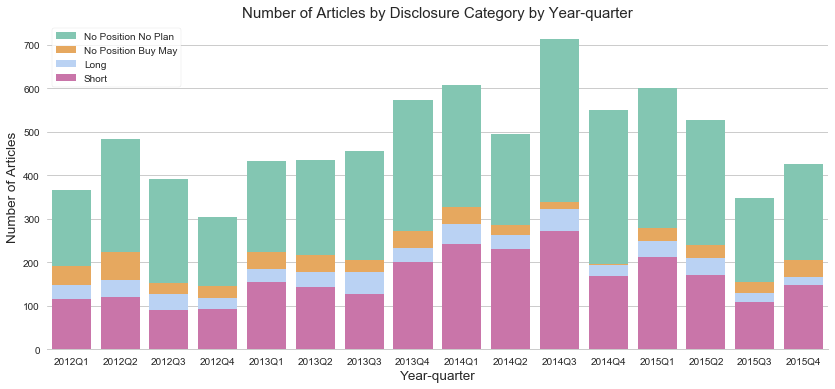

In [51]:
# Disclosure Categoy by yr_qt_str-quarter
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 6))

# Load the dataset
yr_qt_lst = ['2012Q1','2012Q2','2012Q3','2012Q4','2013Q1','2013Q2','2013Q3','2013Q4',\
             '2014Q1','2014Q2','2014Q3','2014Q4','2015Q1','2015Q2','2015Q3','2015Q4']
na = list(df.yr_qt_str.value_counts().sort_index())
no_plan = list(df[df.disclosure_cat=='No Position No Plan'].yr_qt_str.value_counts().sort_index())
but_may = list(df[df.disclosure_cat=='No Position But May'].yr_qt_str.value_counts().sort_index())
long = list(df[df.disclosure_cat=='Long'].yr_qt_str.value_counts().sort_index())
short = list(df[df.disclosure_cat=='Short'].yr_qt_str.value_counts().sort_index())
df_dis = pd.DataFrame({'yr_qt':yr_qt_lst, 'na':na, 'no_plan':[sum(x) for x in zip(short, long, but_may, no_plan)],
                       'but_may':[sum(x) for x in zip(short, long, but_may)],
                       'long':[sum(x) for x in zip(short, long)], 'short':short})
# Draw a plot
sns.barplot(x="yr_qt", y="no_plan", data=df_dis, label="No Position No Plan", color="#78d1b6")
sns.barplot(x="yr_qt", y="but_may", data=df_dis, label="No Position Buy May", color="#fdaa48")
sns.barplot(x="yr_qt", y="long", data=df_dis, label="Long", color="#b1d1fc")
sns.barplot(x="yr_qt", y="short", data=df_dis, label="Short", color="#d767ad")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set_title("Number of Articles by Disclosure Category by Year-quarter", fontsize=15)
ax.set_xlabel("Year-quarter", fontsize=13.5)
ax.set_ylabel("Number of Articles", fontsize=13.5)
sns.despine(left=True, bottom=False)

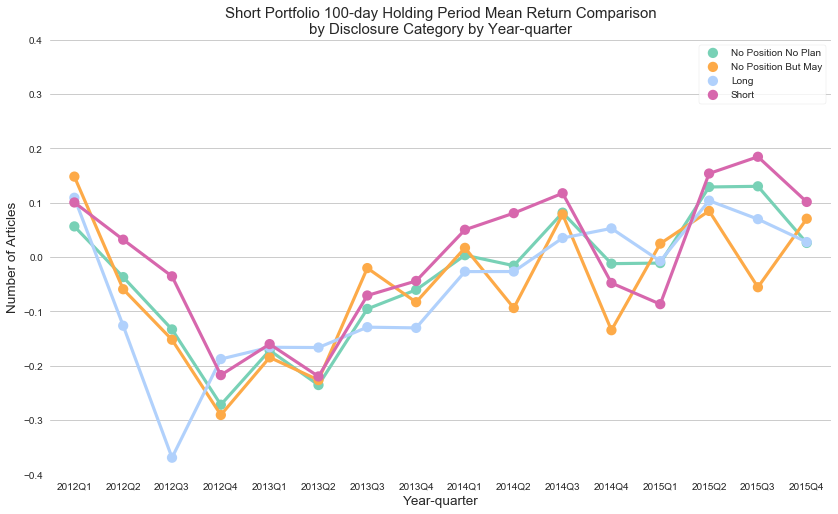

In [52]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(14, 8))

# Load the dataset
yr_qt_lst = ['2012Q1','2012Q2','2012Q3','2012Q4','2013Q1','2013Q2','2013Q3','2013Q4',\
             '2014Q1','2014Q2','2014Q3','2014Q4','2015Q1','2015Q2','2015Q3','2015Q4']
dfa = -df.groupby(['disclosure_cat', 'yr_qt'])['100d_ret'].mean()
no_plan = list(dfa[32:48])
but_may = list(dfa[16:32])
long = list(dfa[0:16])
short = list(dfa[48:64])
df_dis = pd.DataFrame({'yr_qt':yr_qt_lst, 'No Position No Plan':no_plan, 'No Position But May':but_may, 
                       'Long':long, 'Short':short})
df_dis = df_dis.melt('yr_qt', var_name='Disclosure Category',  value_name='vals')

# Settings
palette = ["#78d1b6", "#fdaa48", "#b1d1fc", "#d767ad"]
order = ['No Position No Plan', 'No Position But May', 'Long', 'Short']

# Draw a plot
g1 = sns.factorplot(x="yr_qt", y="vals", hue='Disclosure Category', hue_order=order, data=df_dis, 
                    palette=palette, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper right", frameon=True)
ax1.set_title("Short Portfolio 100-day Holding Period Mean Return Comparison\nby Disclosure Category by Year-quarter",
              fontsize=15)
ax1.set_xlabel("Year-quarter", fontsize=13.5)
ax1.set_ylabel("Number of Articles", fontsize=13.5)
ax1.set_ylim([-.4, .4])
sns.despine(ax=ax1, left=True, bottom=True)
plt.close(g1.fig)

Text(0.075,0.5,'Holding Period Return')

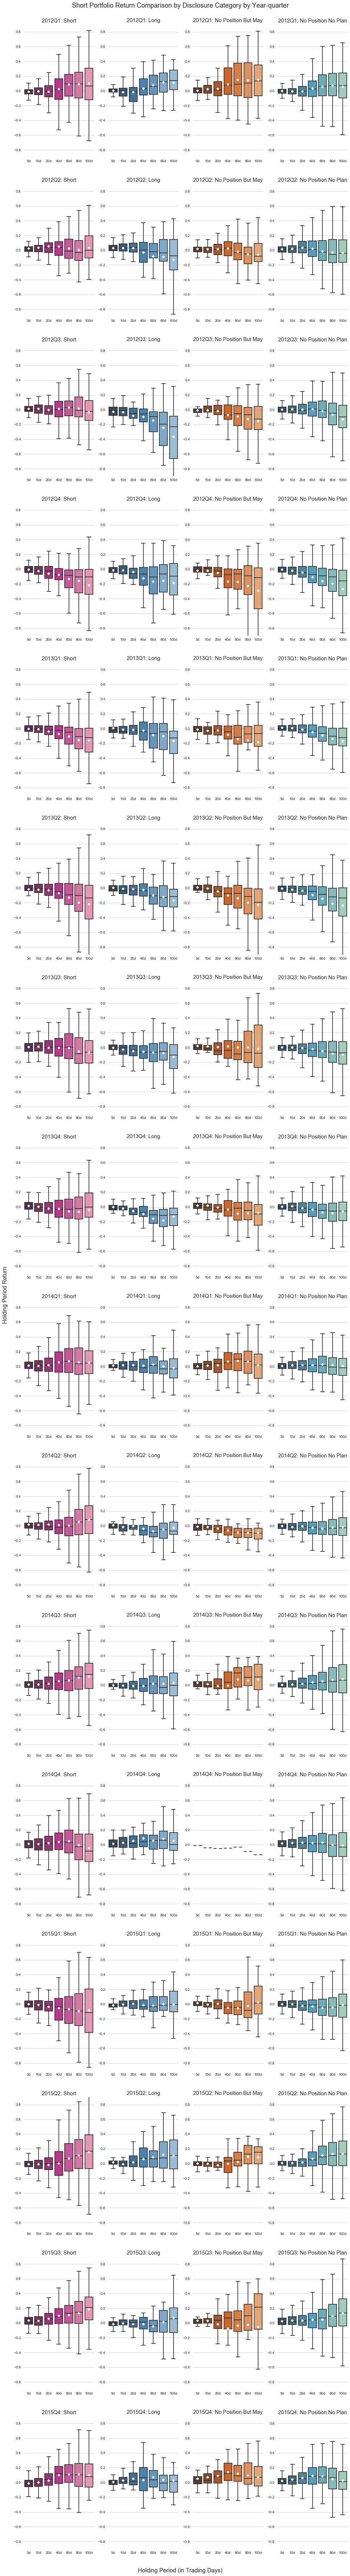

In [53]:
# By Disclosure Category by Year-quarter
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16),\
      (ax17, ax18, ax19, ax20), (ax21, ax22, ax23, ax24), (ax25, ax26, ax27, ax28), (ax29, ax30, ax31, ax32),\
      (ax33, ax34, ax35, ax36), (ax37, ax38, ax39, ax40), (ax41, ax42, ax43, ax44), (ax45, ax46, ax47, ax48),\
      (ax49, ax50, ax51, ax52), (ax53, ax54, ax55, ax56), (ax57, ax58, ax59, ax60), (ax61, ax62, ax63, ax64))\
= plt.subplots(nrows=16, ncols=4, figsize=(16,128))

# Settings
yr_qt_lst = ['2012Q1','2012Q1','2012Q1','2012Q1','2012Q2','2012Q2','2012Q2','2012Q2',\
             '2012Q3','2012Q3','2012Q3','2012Q3','2012Q4','2012Q4','2012Q4','2012Q4',\
             '2013Q1','2013Q1','2013Q1','2013Q1','2013Q2','2013Q2','2013Q2','2013Q2',\
             '2013Q3','2013Q3','2013Q3','2013Q3','2013Q4','2013Q4','2013Q4','2013Q4',\
             '2014Q1','2014Q1','2014Q1','2014Q1','2014Q2','2014Q2','2014Q2','2014Q2',\
             '2014Q3','2014Q3','2014Q3','2014Q3','2014Q4','2014Q4','2014Q4','2014Q4',\
             '2015Q1','2015Q1','2015Q1','2015Q1','2015Q2','2015Q2','2015Q2','2015Q2',\
             '2015Q3','2015Q3','2015Q3','2015Q3','2015Q4','2015Q4','2015Q4','2015Q4']
disclosure_cat = ['Short', 'Long', 'No Position But May', 'No Position No Plan']
my_palette = ['RdPu_d', 'Blues_d', 'Oranges_d', 'GnBu_d']
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

for i, ax in enumerate(fig.axes):
    sns.boxplot(data=-df[(df.yr_qt.astype(str)==yr_qt_lst[i])&(df.disclosure_cat==disclosure_cat[i%4])]
               [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
               palette=my_palette[i%4], fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax)
    ax.set_title(yr_qt_lst[i]+': '+disclosure_cat[i%4], fontsize=14.5)
    ax.set_ylim([-.9, .9])
    ax.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
    sns.despine(left=True, bottom=True)

fig.text(0.5, 0.885, 'Short Portfolio Return Comparison by Disclosure Category by Year-quarter', 
         fontsize=18, ha='center')
fig.text(0.5, 0.118, 'Holding Period (in Trading Days)', fontsize=16, ha='center')
fig.text(0.075, 0.5, 'Holding Period Return', fontsize=16, va='center', rotation='vertical')

# Q5: *Are there any authors of SA short ideas articles who predict future stock returns?*

>### Motivation
In this section, I will track the authors' individual performance and check if there's anyone who consistently predict future returns and deserve to be called "informed trader". Picking the right stock at a right time once or twice really isn't that hard. What determines the informed trader is the ability to "consistently" pick the right one at the right time. I assume that the authors who satisfy the following conditions as informed short seller.
* **Consistency**: *Published articles in short ideas section of SA **more than 30 times** during the sample period.*
* **Profitability I**: *The stocks they recommend generate positive average returns by short-selling for all different time periods (5-day ~ 100-day return).*
* **Profitability II**: *Longer the compound period, larger the average compound returns by short-selling.*

>By screening the performance of individual authors, I was able to find some authors who satisfy the conditions of informed trader above. (Please note that the conditions are pretty strict, so there would be more “informed short seller” among the authors on SA if we make the assumption less strict.) Let’s take a look how well they did and what kinds of stocks they recommended.

>### Summary of Results
* The stocks they recommended shorting generate a significant return. (10 ~ 30% in 100-days)
* They are hedge fund managers, analyst or private investors. 
* Some of them focus only on their specialized sector but the others hold diversified portfolio.


## Let's find out the authors who satisfy the conditions of informed short seller

In [54]:
# Create a dataframe containing mean returns of stocks recommended by each author
dfa = df.groupby('author_id')['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret'].mean()
dfa['num_article'] = df.groupby('author_id').size()
dfa.reset_index(inplace=True)

# List of informed short sellers
informed_lst = list(dfa[(dfa.num_article>=30)&(dfa['5d_ret']<0)&(dfa['10d_ret']<0)&(dfa['20d_ret']<0)&\
                        (dfa['40d_ret']<0)&(dfa['60d_ret']<0)&(dfa['80d_ret']<0)&(dfa['100d_ret']<0)&\
                        (dfa['5d_ret']>dfa['10d_ret'])&(dfa['10d_ret']>dfa['20d_ret'])&\
                        (dfa['20d_ret']>dfa['40d_ret'])&(dfa['40d_ret']>dfa['60d_ret'])&\
                        (dfa['60d_ret']>dfa['80d_ret'])&(dfa['80d_ret']>dfa['100d_ret'])]['author_id'])

# Dictionary with author_id as index and author_name as value
informed_dic = {}
for i, author_id in enumerate(informed_lst):
    informed_dic[author_id] = [df[df.author_id==author_id].author_name.unique() for author_id in informed_lst][i][0]

In [55]:
# Informed authors
informed_dic

{234439: 'Whitney Tilson',
 6546411: 'Ben Kramer-Miller',
 6920841: 'Quoth the Raven',
 13051392: 'The Specialist',
 23396043: 'Meson Capital Partners'}

## Let's take a closer look at the informed short sellers' strategy

* Compound returns of the stocks recommended by the author
* Number of articles published by the author by year
* % of the ticker of the stocks recommended by the author
* % of SIC industry classification of the stocks recommended by the author

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

def author_performance(author_id):
    
    """Generate the summary plots of the stocks that the author recommended shorting in their ideas articles.

    Args:
        csv_file_name: string of csv file name including '.csv'  ex) 'crsp_2012.csv'
    Returns:
        4 plots including compound return distribution, number of articles published by year, 
        ticker of stocks recommended, sic code of stocks recommended         
    """
    
    # Initialize the matplotlib figure
    fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(20,20))
    fig.text(0.5, 0.92,
             'Analysis of Short Recommendations of the Author, "'+informed_dic[author_id]+'" (ID: '+str(author_id)+')',
             fontsize=20, ha='center')

    # ax1: Compound returns of the stocks recommended by the author
    meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')
    sns.boxplot(data=-df[df.author_id==author_id]\
                [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
                palette="GnBu_d", fliersize=0, showmeans=True, meanprops=meanpointprops, ax=ax1)
    sns.stripplot(data=-df[df.author_id==author_id]\
                  [['5d_ret','10d_ret','20d_ret','40d_ret','60d_ret','80d_ret','100d_ret']],
                  jitter=0.15, size=3, ax=ax1)
    ax1.set_title('Short Portfolio Return of Stocks Recommended by the Author', fontsize=17)
    ax1.set_xlabel('Holding Period (in Trading Days)', fontsize=15)    
    ax1.set_xticklabels(('5d', '10d', '20d', '40d', '60d', '80d', '100d'))
    ax1.set_ylabel('Holding Period Return', fontsize=15)    
    ax1.set_ylim([-.8, .8])
    sns.despine(left=True, bottom=False)

    # ax2: Number of articles published by the author by year
    yr_lst = [2012, 2013, 2014, 2015]
    g1 = sns.factorplot(x="year", data=df[df.author_id==author_id][['article_id','year']], 
                        kind="count", palette="husl", order=yr_lst, ax=ax2)
    ax2.set_title('Number of Articles Written by the Author by Year', fontsize=17)
    ax2.set_xlabel('Year', fontsize=15)    
    ax2.set_ylabel('Number of Articles', fontsize=15)    
    plt.close(g1.fig)

    # ax3: % of the ticker of the stocks recommended by the author
    colors = sns.color_palette("Set3", 10)
    df[df.author_id==author_id].ticker.value_counts().plot.pie(autopct='%1.1f%%', ax=ax3, shadow=False, fontsize=12,
                                                               colors=colors, startangle=90, counterclock=False)
    ax3.set_title('Ticker of Stocks Recommended by the Author', fontsize=17)
    ax3.set_ylabel('')    

    # ax4: % of SIC industry classification of the stocks recommended by the author
    colors = sns.color_palette("Set3", 10)
    df[df.author_id==author_id].sic2_name.value_counts().plot.pie(autopct='%1.1f%%', ax=ax4, shadow=False, fontsize=12,
                                                                  colors=colors, startangle=90, counterclock=False)
    ax4.set_title('SIC Industry of Stocks Recommended by the Author', fontsize=17)
    ax4.set_ylabel('')
       
    return plt.show()   


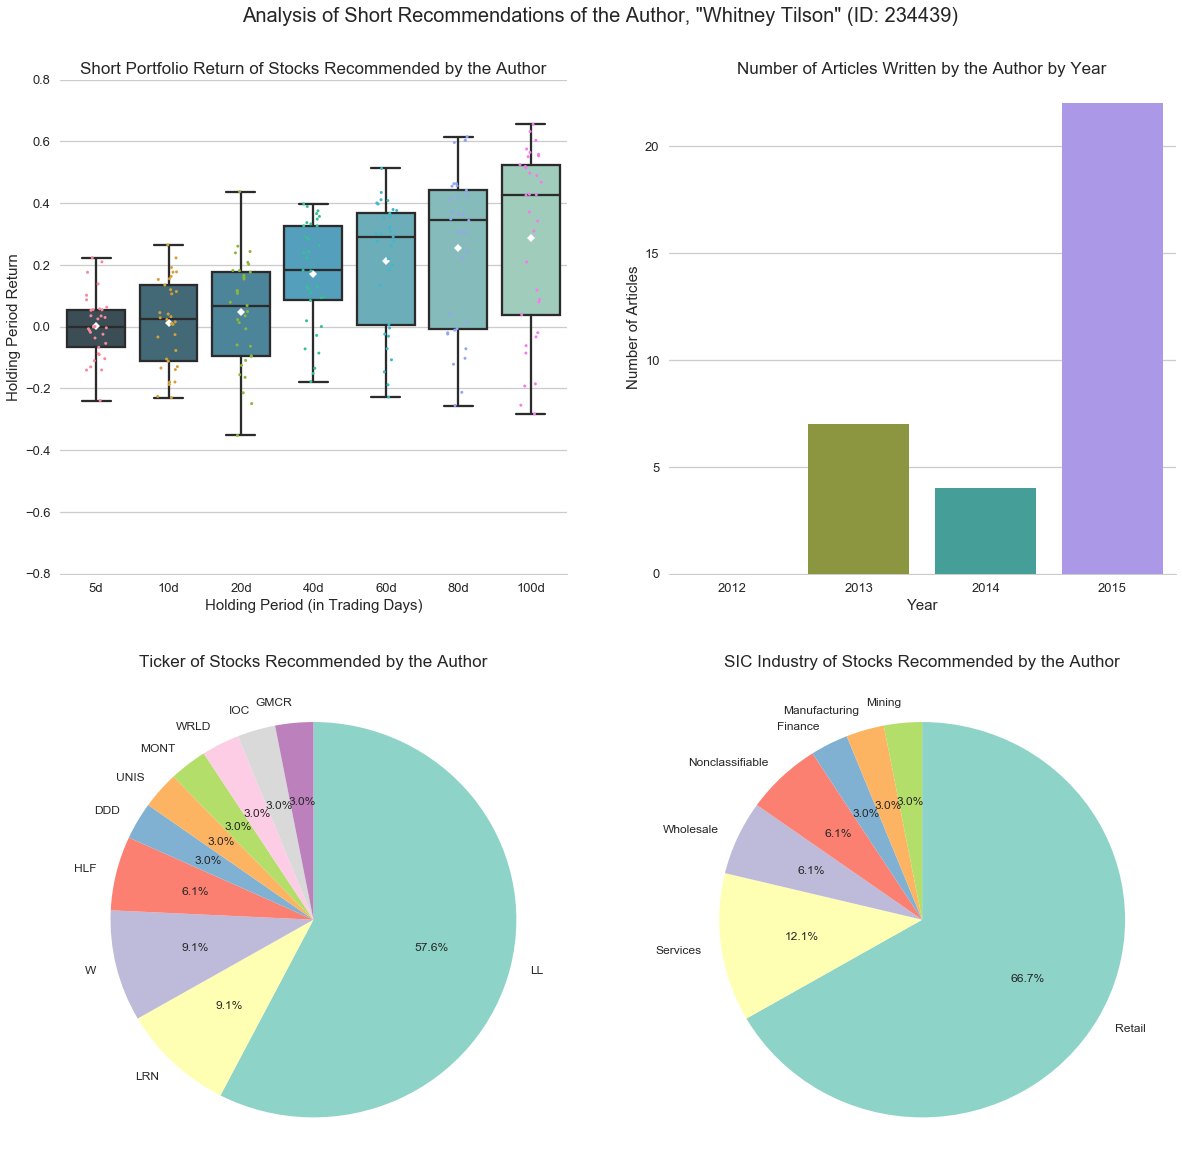

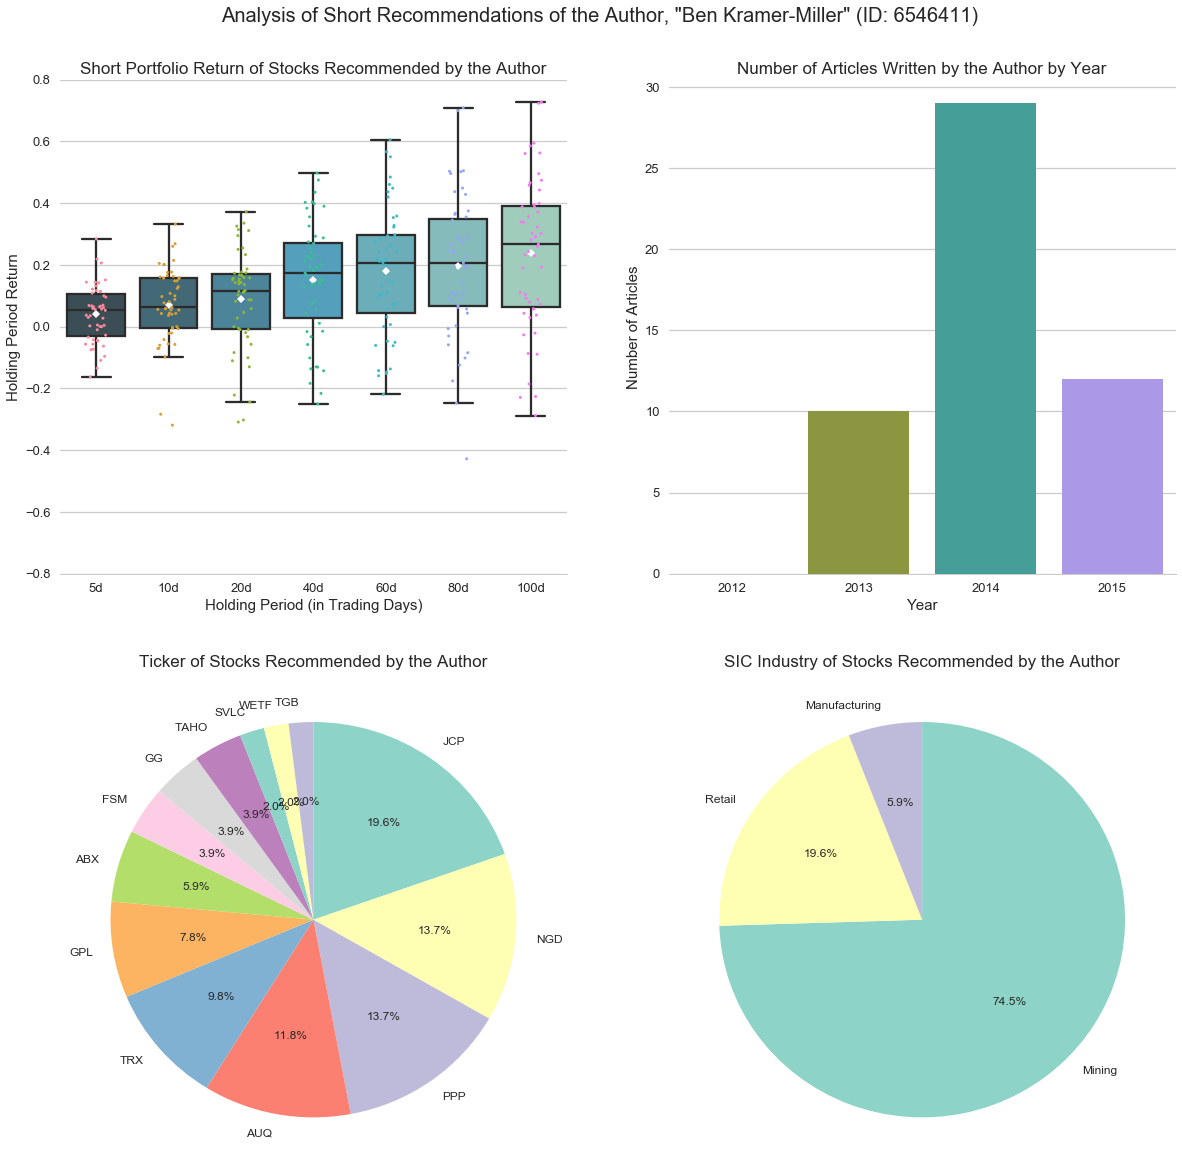

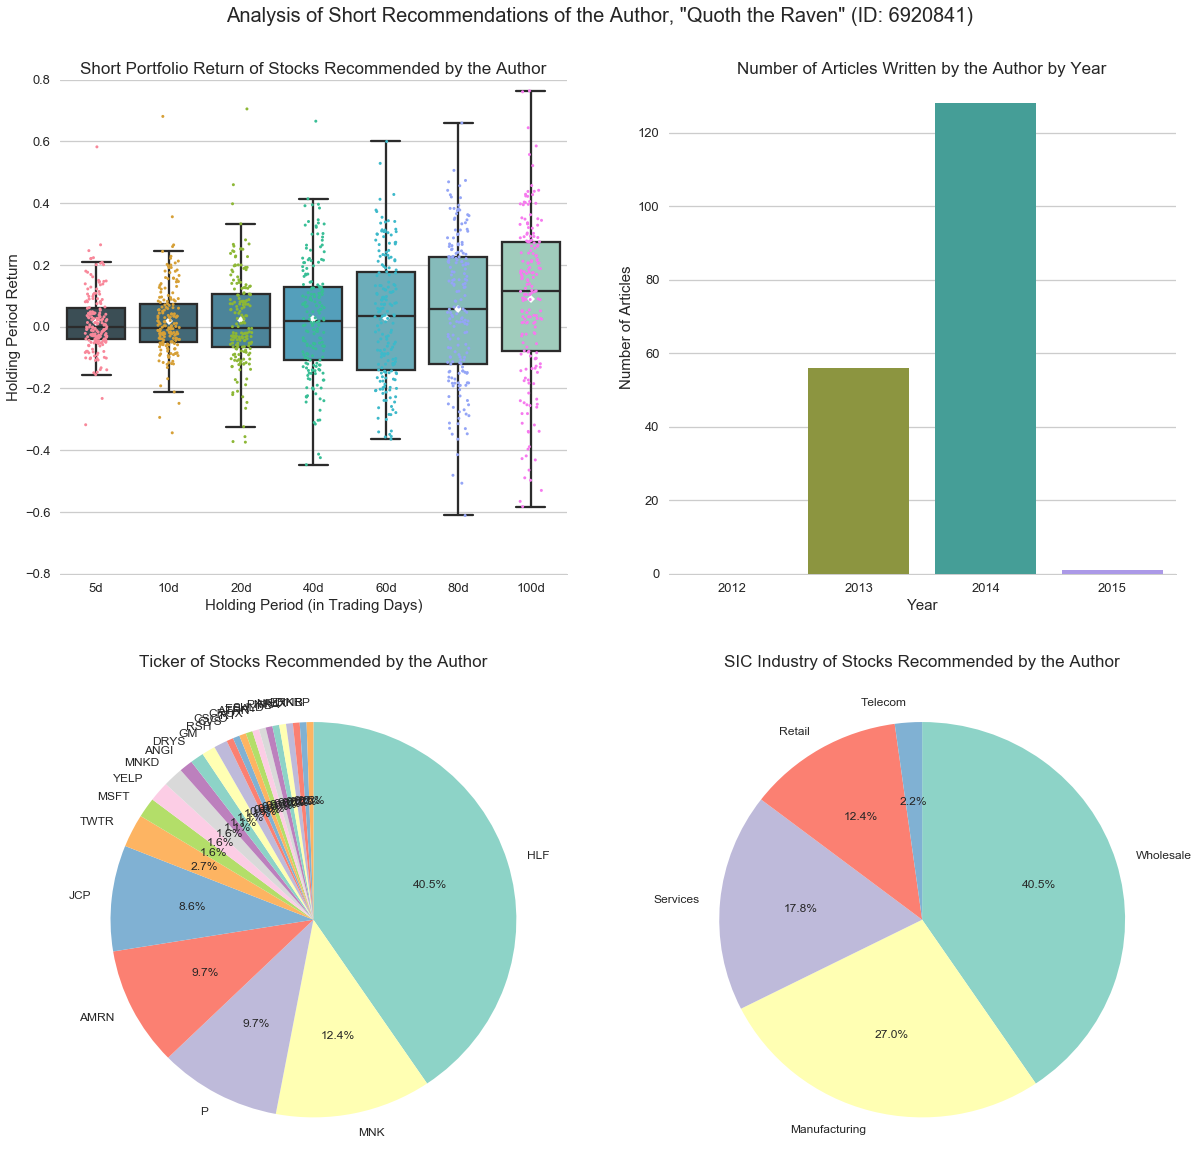

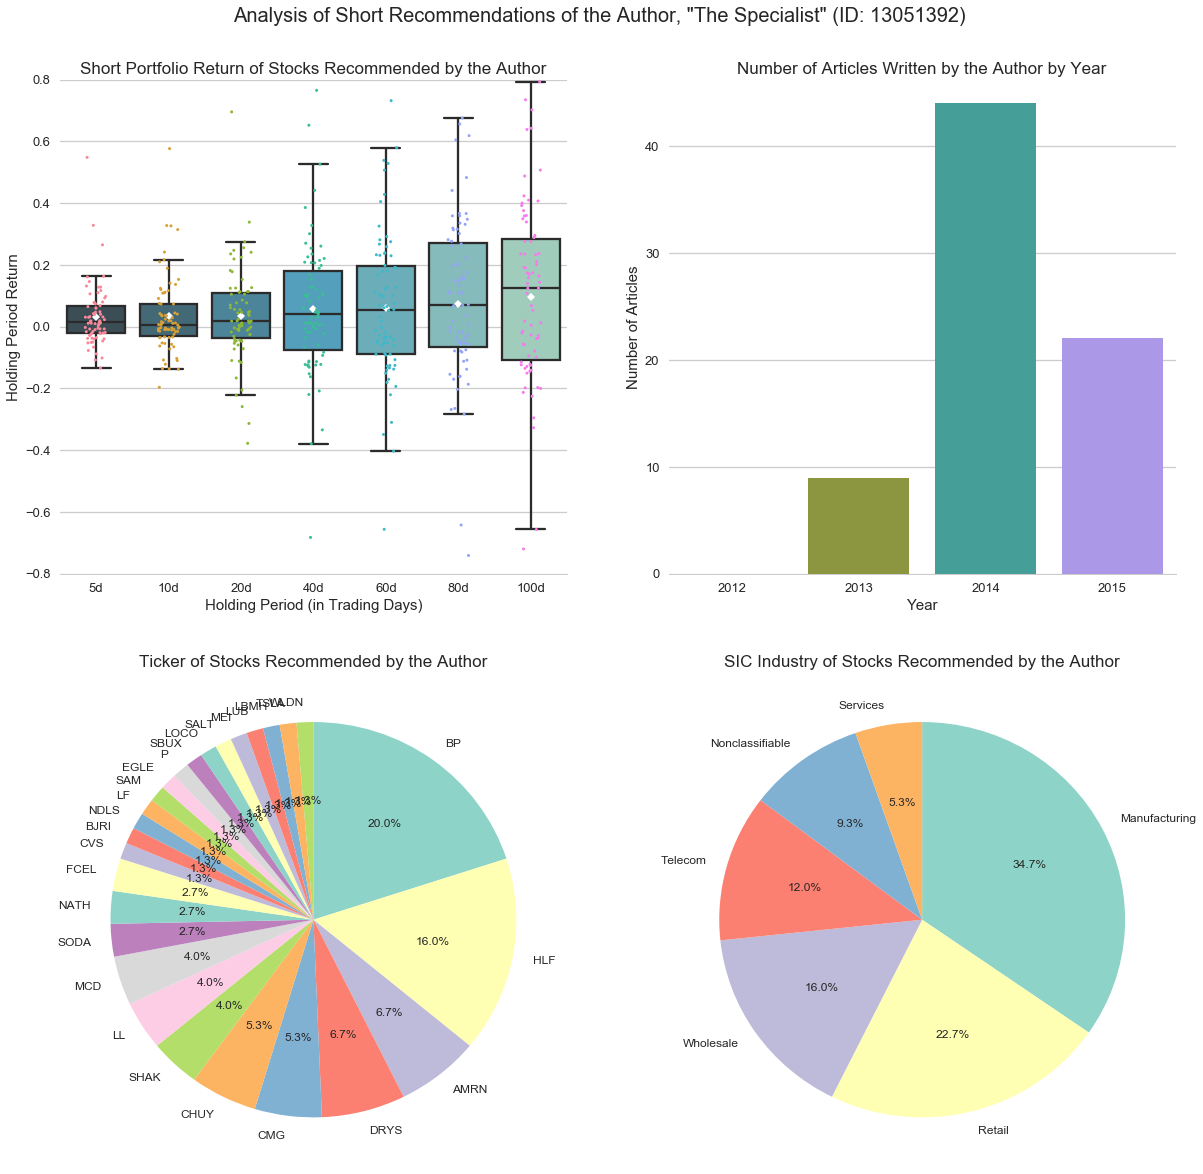

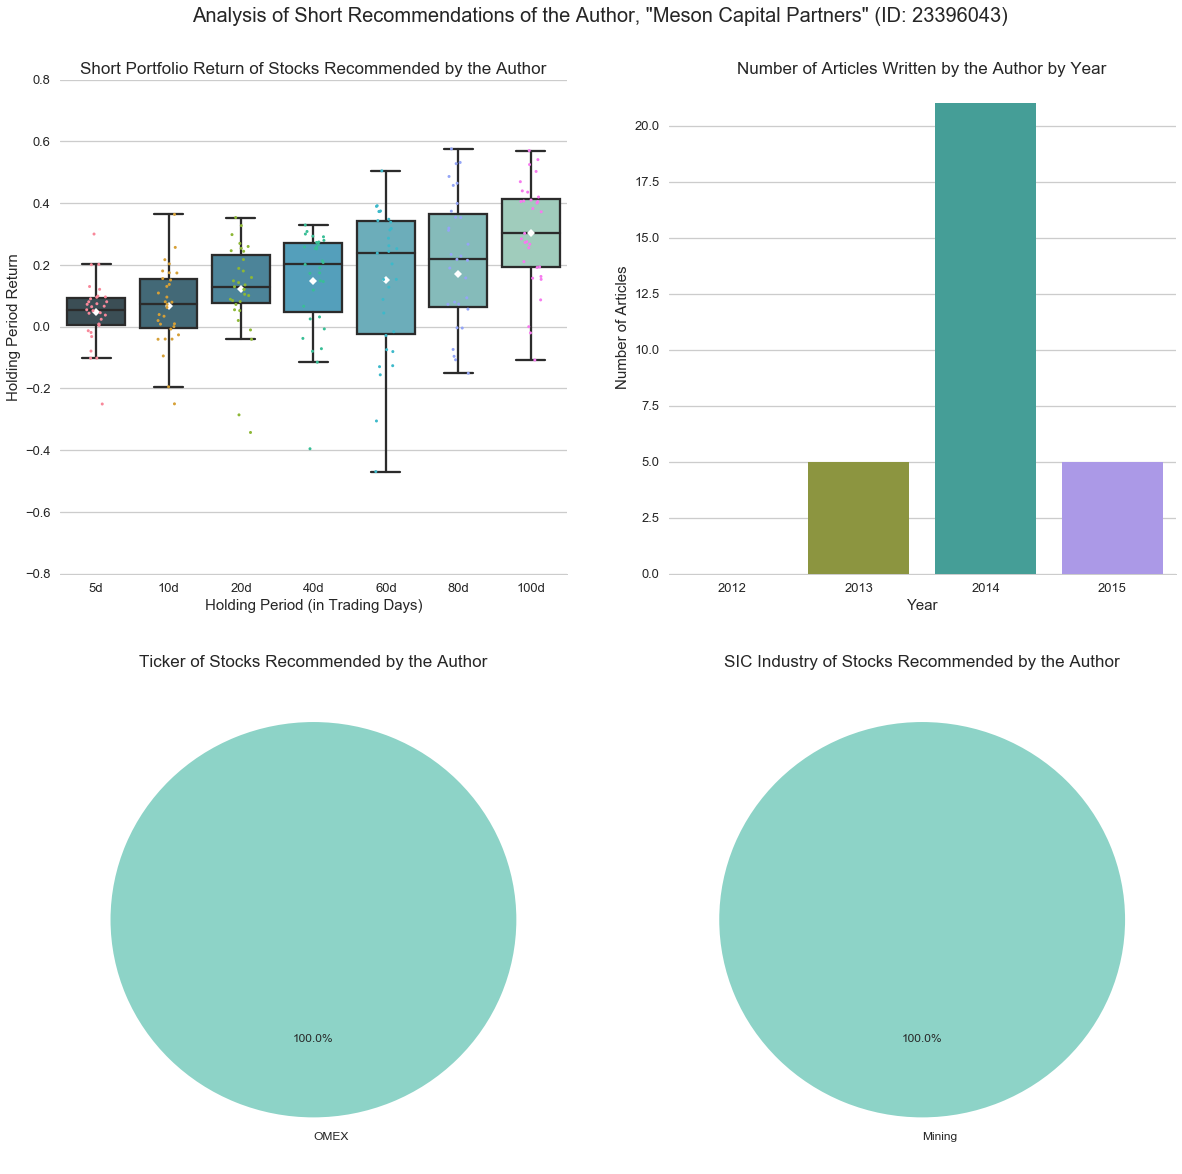

[None, None, None, None, None]

In [57]:
# Analysis of the stocks recommended by the selected informed authors
[author_performance(author) for author in informed_lst]

## More infomation about the informed authors

In [58]:
df_inf5 = pd.DataFrame({'author_id': informed_lst})
df_inf5['author_name'] = [informed_dic[each] for each in df_inf5.author_id]
df_inf5['num_articles'] = [len(df[df.author_id==each]) for each in df_inf5.author_id]
df_inf5['editors_pick'] = [len(df[(df.author_id==each)&(df.editors_pick==True)]) for each in df_inf5.author_id]
df_inf5['editors_pick_ratio'] = df_inf5.editors_pick / df_inf5.num_articles
df_inf5['avg_5d_ret'] = [list(-dfa[dfa['author_id']==each]['5d_ret'])[0] for each in df_inf5.author_id]
df_inf5['avg_10d_ret'] = [list(-dfa[dfa['author_id']==each]['10d_ret'])[0] for each in df_inf5.author_id]
df_inf5['avg_20d_ret'] = [list(-dfa[dfa['author_id']==each]['20d_ret'])[0] for each in df_inf5.author_id]
df_inf5['avg_40d_ret'] = [list(-dfa[dfa['author_id']==each]['40d_ret'])[0] for each in df_inf5.author_id]
df_inf5['avg_60d_ret'] = [list(-dfa[dfa['author_id']==each]['60d_ret'])[0] for each in df_inf5.author_id]
df_inf5['avg_80d_ret'] = [list(-dfa[dfa['author_id']==each]['80d_ret'])[0] for each in df_inf5.author_id]
df_inf5['avg_100d_ret'] = [list(-dfa[dfa['author_id']==each]['100d_ret'])[0] for each in df_inf5.author_id]

# Information from author's SA web page
df_inf5['num_followers'] = [6789, 3660, 6229, 1303, 353]
df_inf5['contributor_since'] = [2006, 2013, 2013, 2013, 2013]
df_inf5['occupation'] = ['Hedge fund manager', 'Analyst', 'Analyst', 'Private investor', 'Hedge fund manager']

In [59]:
df_inf5

,author_id,author_name,num_articles,editors_pick,editors_pick_ratio,avg_5d_ret,avg_10d_ret,avg_20d_ret,avg_40d_ret,avg_60d_ret,avg_80d_ret,avg_100d_ret,num_followers,contributor_since,occupation
0,234439,Whitney Tilson,33,6,0.181818,0.002463,0.012976,0.046373,0.169611,0.212171,0.253206,0.285798,6789,2006,Hedge fund manager
1,6546411,Ben Kramer-Miller,51,4,0.078431,0.040298,0.069362,0.089024,0.151255,0.179323,0.196535,0.237135,3660,2013,Analyst
2,6920841,Quoth the Raven,185,6,0.032432,0.016748,0.018060,0.021180,0.023797,0.026766,0.058396,0.090159,6229,2013,Analyst
3,13051392,The Specialist,75,0,0.000000,0.031926,0.033929,0.034811,0.056610,0.060807,0.073015,0.096059,1303,2013,Private investor
4,23396043,Meson Capital Partners,31,1,0.032258,0.046934,0.066462,0.121786,0.149194,0.152714,0.171272,0.302249,353,2013,Hedge fund manager


In [60]:
df[df.author_name=='Whitney Tilson'].disclosure_cat.value_counts()

Short    24
n/a       9
Name: disclosure_cat, dtype: int64

In [61]:
df[df.author_name=='Ben Kramer-Miller'].disclosure_cat.value_counts()

No Position No Plan    35
Long                   11
No Position But May     5
Name: disclosure_cat, dtype: int64

In [62]:
df[df.author_name=='Quoth the Raven'].disclosure_cat.value_counts()

Short                  110
No Position No Plan     54
No Position But May     17
Long                     4
Name: disclosure_cat, dtype: int64

In [63]:
df[df.author_name=='The Specialist'].disclosure_cat.value_counts()

No Position No Plan    46
Short                  19
No Position But May     6
Long                    4
Name: disclosure_cat, dtype: int64

In [64]:
df[df.author_name=='Meson Capital Partners'].disclosure_cat.value_counts()

Short    31
Name: disclosure_cat, dtype: int64

# 3. Conclusion and Future Work

Contrary to expectations, overall short recommendations of SA (from 2012 to 2015) didn’t predict future returns on average. More surprisingly, the short recommendations of both top opinion leaders and SA editors performed even worse than the ones of the other authors. However, **in the case that the authors recommend shorting the stock they have sold short, the short recommendations predicted the future returns on average** and **consistently outperform the short portfolio constucted using the stocks the authors haven't sold short over time.** During the sample time period, there exist some authors who generate significant returns by shorting the right stock at the right time on average. How they obtain the information advantage will be left for future work.